# installation librarys


In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from scipy import stats
import statsmodels.api as sm

# Preprocessing

In [3]:
df = pd.read_csv('/content/HeartDiseaseTrain-Test.csv')

In [4]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'target' not in df.columns and 'diagnosis' in df.columns:
  df.rename(columns={'diagnosis':'target'}, inplace=True)

In [7]:
missing = df.isnull().sum()
display(missing)

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [8]:
y_target = df['target']
df_preprocessed = df.drop('target', axis=1).copy()

numerical_features_to_scale = [col for col in num_cols if col != 'target']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_preprocessed[cat_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_cols), index=df_preprocessed.index)

df_preprocessed = pd.concat([df_preprocessed.drop(columns=cat_cols), encoded_df], axis=1)

scaler = StandardScaler()
df_preprocessed[numerical_features_to_scale] = scaler.fit_transform(df_preprocessed[numerical_features_to_scale])

df_final_preprocessed = pd.concat([df_preprocessed, y_target], axis=1)

print("Data preprocessing complete. First 5 rows of df_final_preprocessed:")
print(df_final_preprocessed.head())

Data preprocessing complete. First 5 rows of df_final_preprocessed:
        age  resting_blood_pressure  cholestoral  Max_heart_rate   oldpeak  \
0 -0.268437               -0.377636    -0.659332        0.821321 -0.060888   
1 -0.158157                0.479107    -0.833861        0.255968  1.727137   
2  1.716595                0.764688    -1.396233       -1.048692  1.301417   
3  0.724079                0.936037    -0.833861        0.516900 -0.912329   
4  0.834359                0.364875     0.930822       -1.874977  0.705408   

   sex_Female  sex_Male  chest_pain_type_Asymptomatic  \
0         0.0       1.0                           0.0   
1         0.0       1.0                           0.0   
2         0.0       1.0                           0.0   
3         0.0       1.0                           0.0   
4         1.0       0.0                           0.0   

   chest_pain_type_Atypical angina  chest_pain_type_Non-anginal pain  ...  \
0                              0.0         

In [9]:
numerical_cols_preprocessed = [col for col in df_final_preprocessed.columns if col not in cat_cols and col != 'target']
descriptive_stats = df_final_preprocessed[numerical_cols_preprocessed].agg(['min', 'max', 'mean', 'var', 'std', 'skew', 'kurt'])

print("Descriptive Statistics for Numerical Features (after preprocessing):")
display(descriptive_stats)


Descriptive Statistics for Numerical Features (after preprocessing):


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_Female,sex_Male,chest_pain_type_Asymptomatic,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,...,slope_Upsloping,vessels_colored_by_flourosopy_Four,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_Fixed Defect,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
min,-2.804866e+00,-2.148237e+00,-2.327054e+00,-3.397080e+00,-9.123291e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.488552e+00,3.906079e+00,6.166694e+00,2.299935e+00,4.366603e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,-3.431402e-16,-7.036106e-16,-3.466062e-18,-4.332578e-16,-2.426243e-16,0.304390,0.695610,0.075122,0.162927,0.277073,...,0.072195,0.017561,0.220488,0.067317,0.130732,0.563902,0.530732,0.006829,0.062439,0.400000
var,1.000977e+00,1.000977e+00,1.000977e+00,1.000977e+00,1.000977e+00,0.211944,0.211944,0.069546,0.136515,0.200499,...,0.067048,0.017269,0.172041,0.062847,0.113752,0.246157,0.249299,0.006789,0.058598,0.240234
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,0.460373,0.460373,0.263717,0.369479,0.447771,...,0.258937,0.131413,0.414778,0.250693,0.337271,0.496142,0.499298,0.082397,0.242069,0.490137
skew,-2.488659e-01,7.397682e-01,1.074073e+00,-5.137772e-01,1.210899e+00,0.851449,-0.851449,3.228531,1.828153,0.997664,...,3.310776,7.356675,1.350403,3.458648,2.194022,-0.258101,-0.123340,11.994013,3.622238,0.408847
kurt,-5.256178e-01,9.912207e-01,3.996803e+00,-8.882249e-02,1.314471e+00,-1.277531,-1.277531,8.439874,1.344762,-1.006635,...,8.978751,52.222564,-0.176761,9.981721,2.819228,-1.937167,-1.988671,142.133684,11.142349,-1.836431


Generating Histograms for Numerical Features...


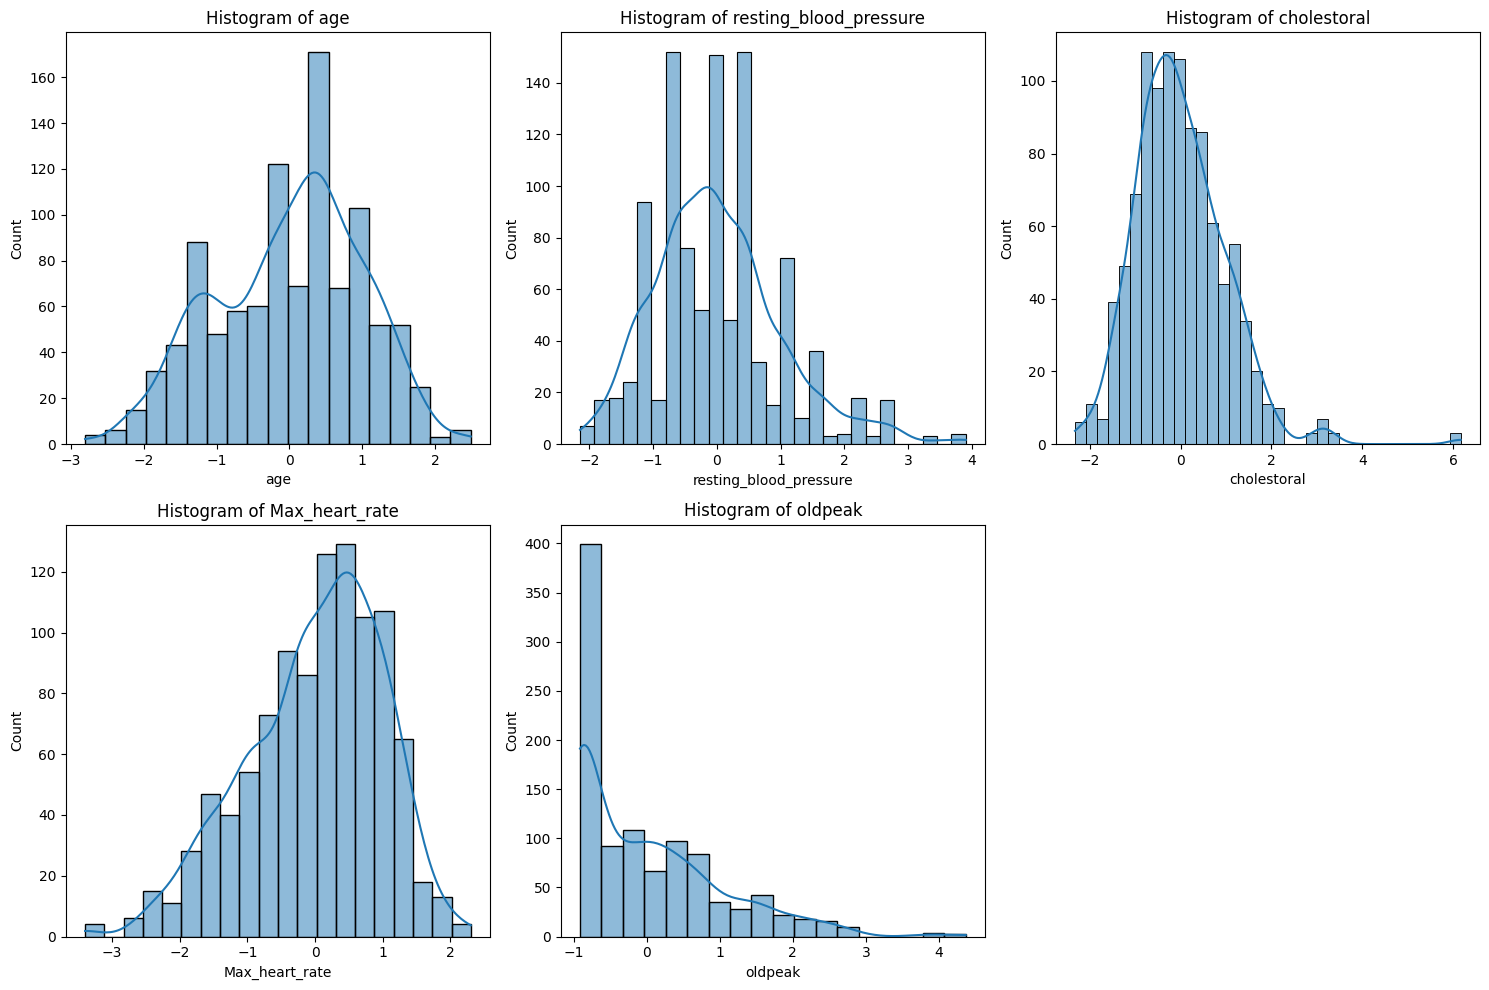

In [10]:
print("Generating Histograms for Numerical Features...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_to_scale):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_final_preprocessed[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


Generating Box Plots for Numerical Features...


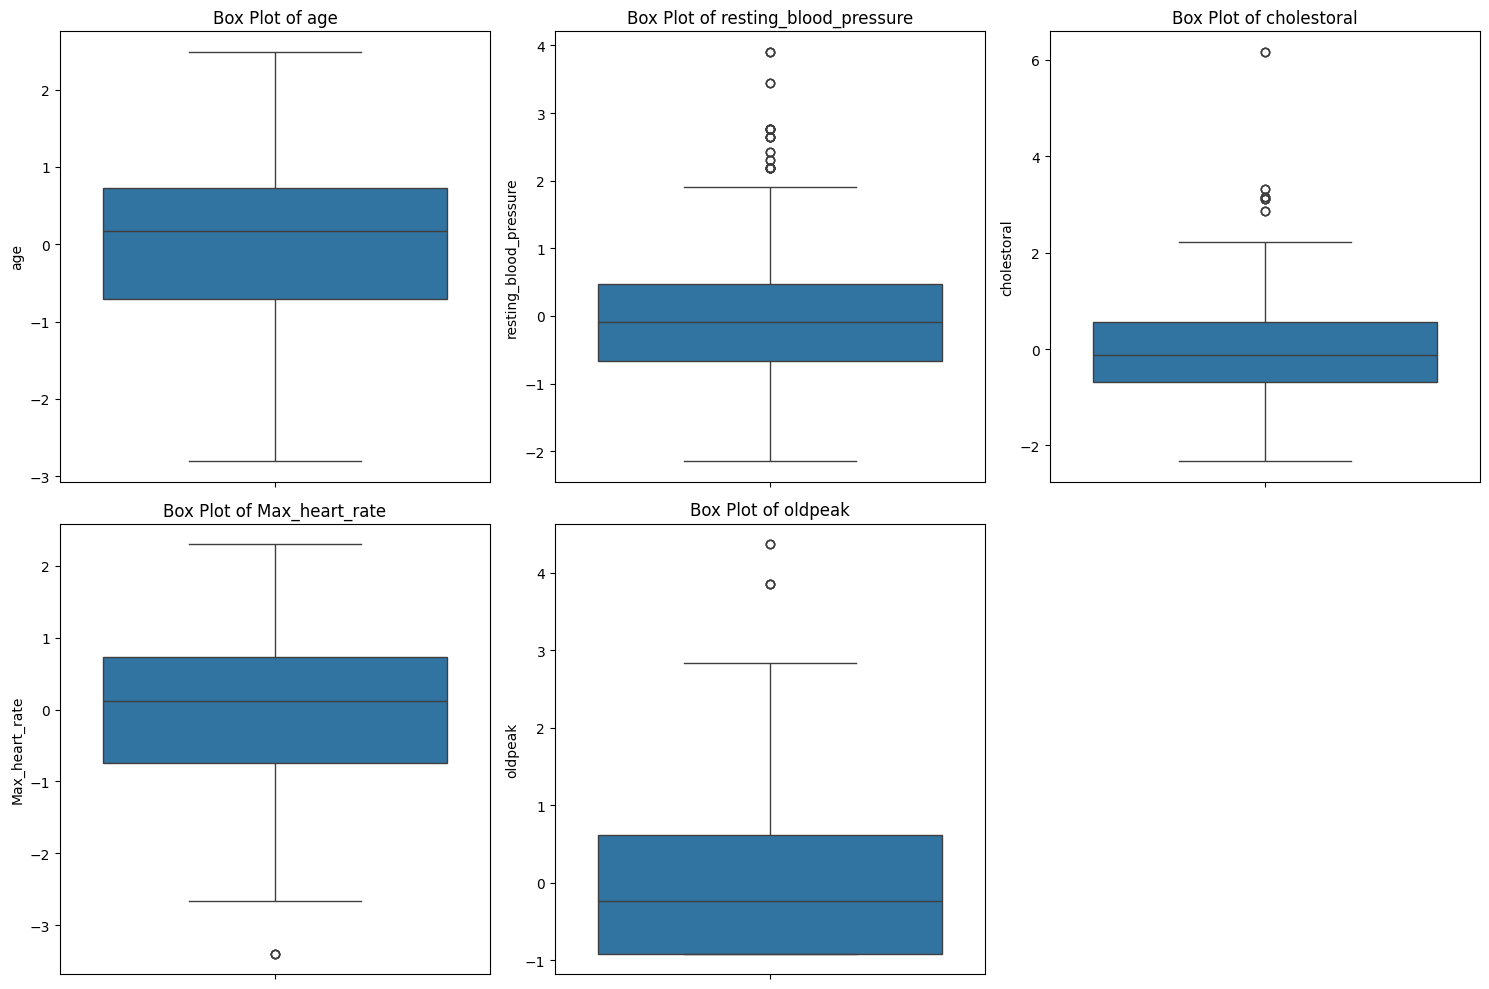

In [11]:
print("\nGenerating Box Plots for Numerical Features...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_to_scale):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_final_preprocessed[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


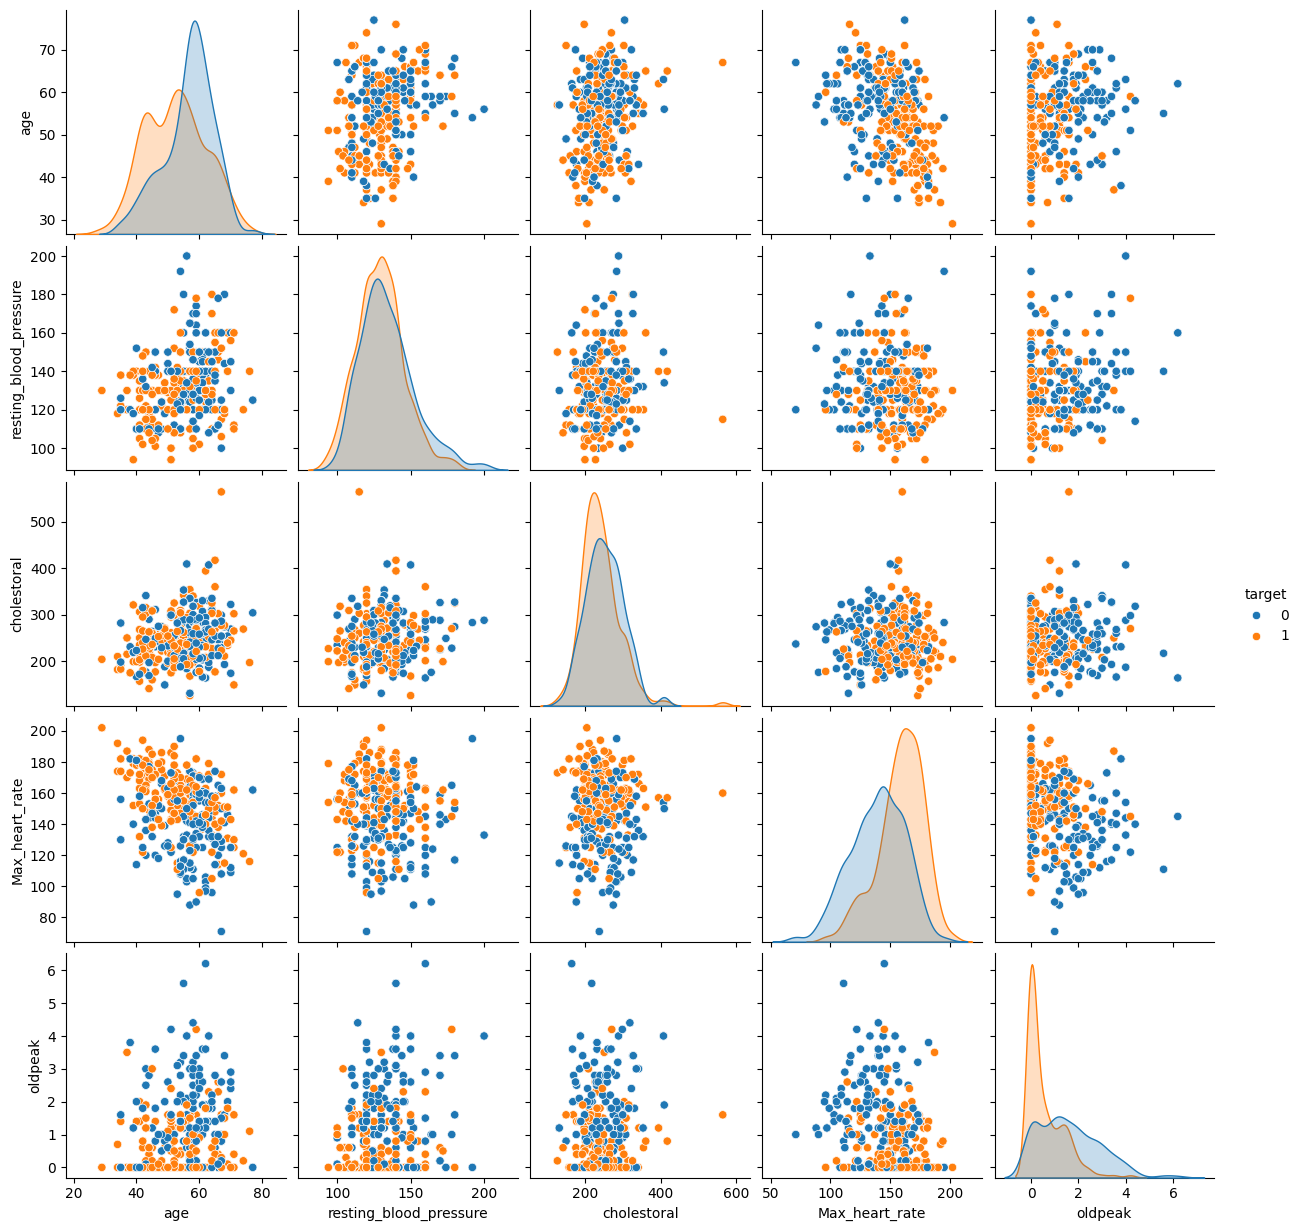

In [12]:
sns.pairplot(data=df,hue='target')
plt.show()

Generating Enhanced Bar Plots for Categorical Features...


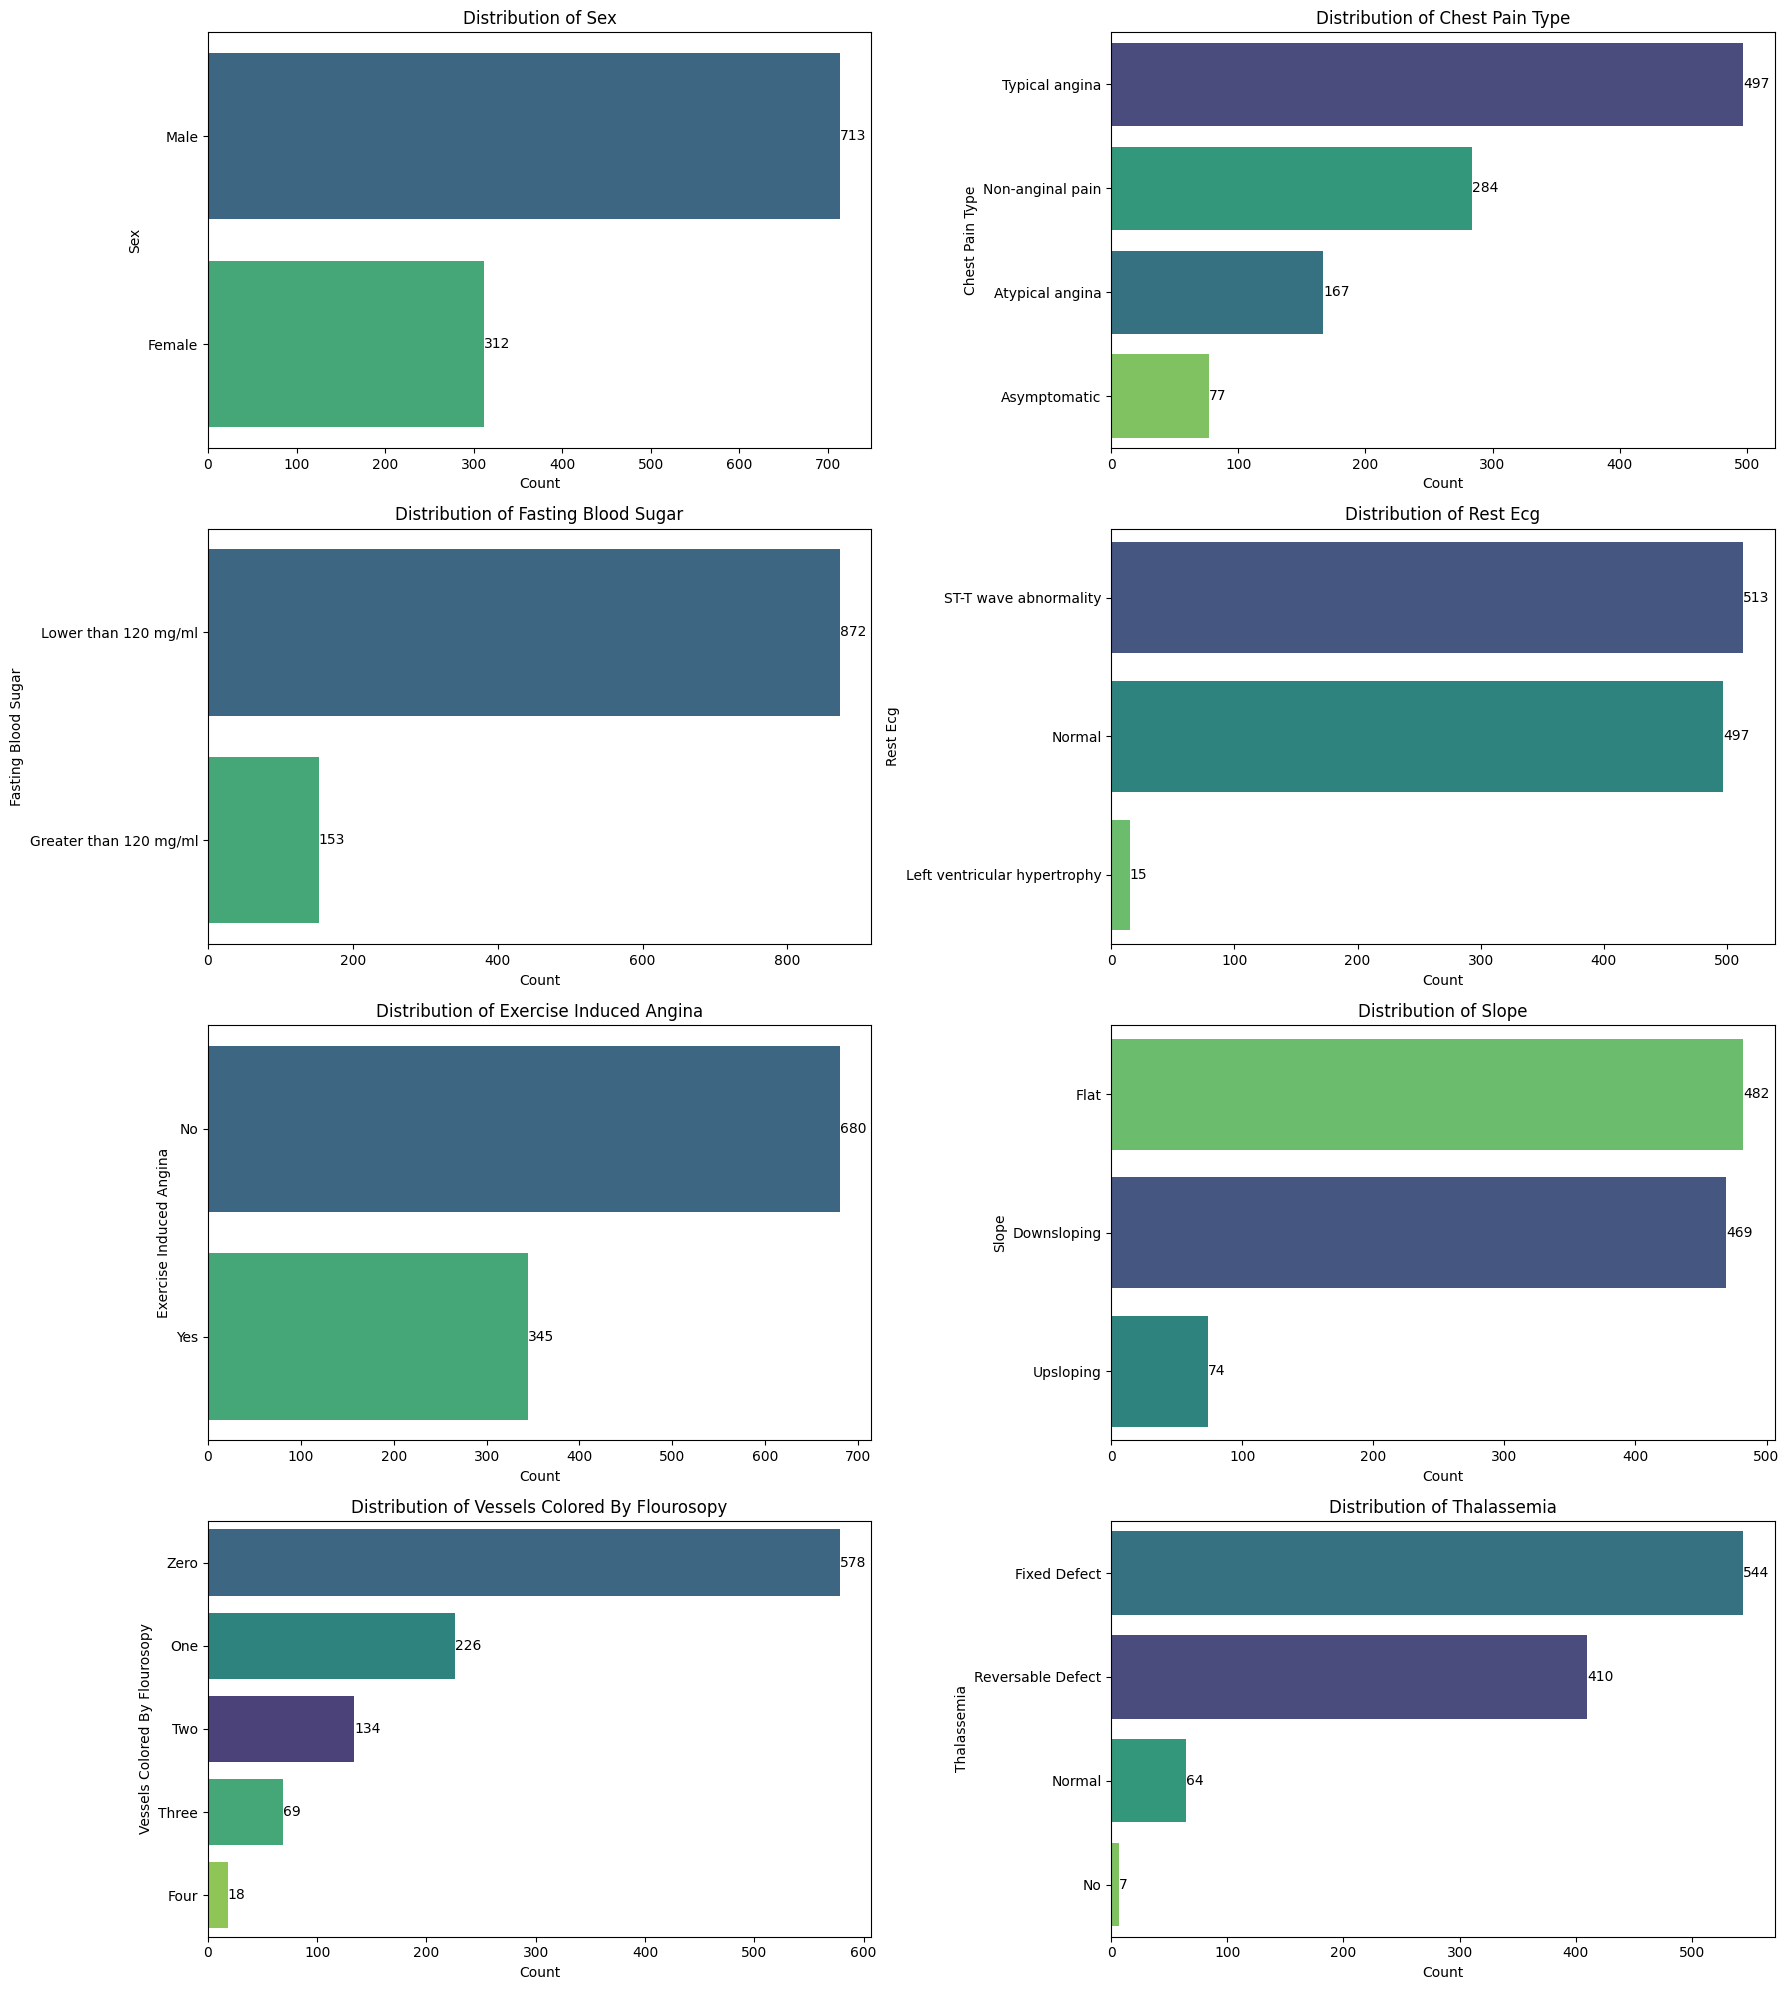

In [13]:
print("Generating Enhanced Bar Plots for Categorical Features...")
num_cat_cols = len(cat_cols)
rows = (num_cat_cols + 1) // 2

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, 2, i + 1)
    sns.countplot(y=df[col], hue=df[col], order = df[col].value_counts().index, palette='viridis', legend=False)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel('Count')
    plt.ylabel(f'{col.replace("_", " ").title()}')
    for container in plt.gca().containers:
        plt.gca().bar_label(container)

plt.tight_layout()
plt.show()

Generating Correlation Heatmap...


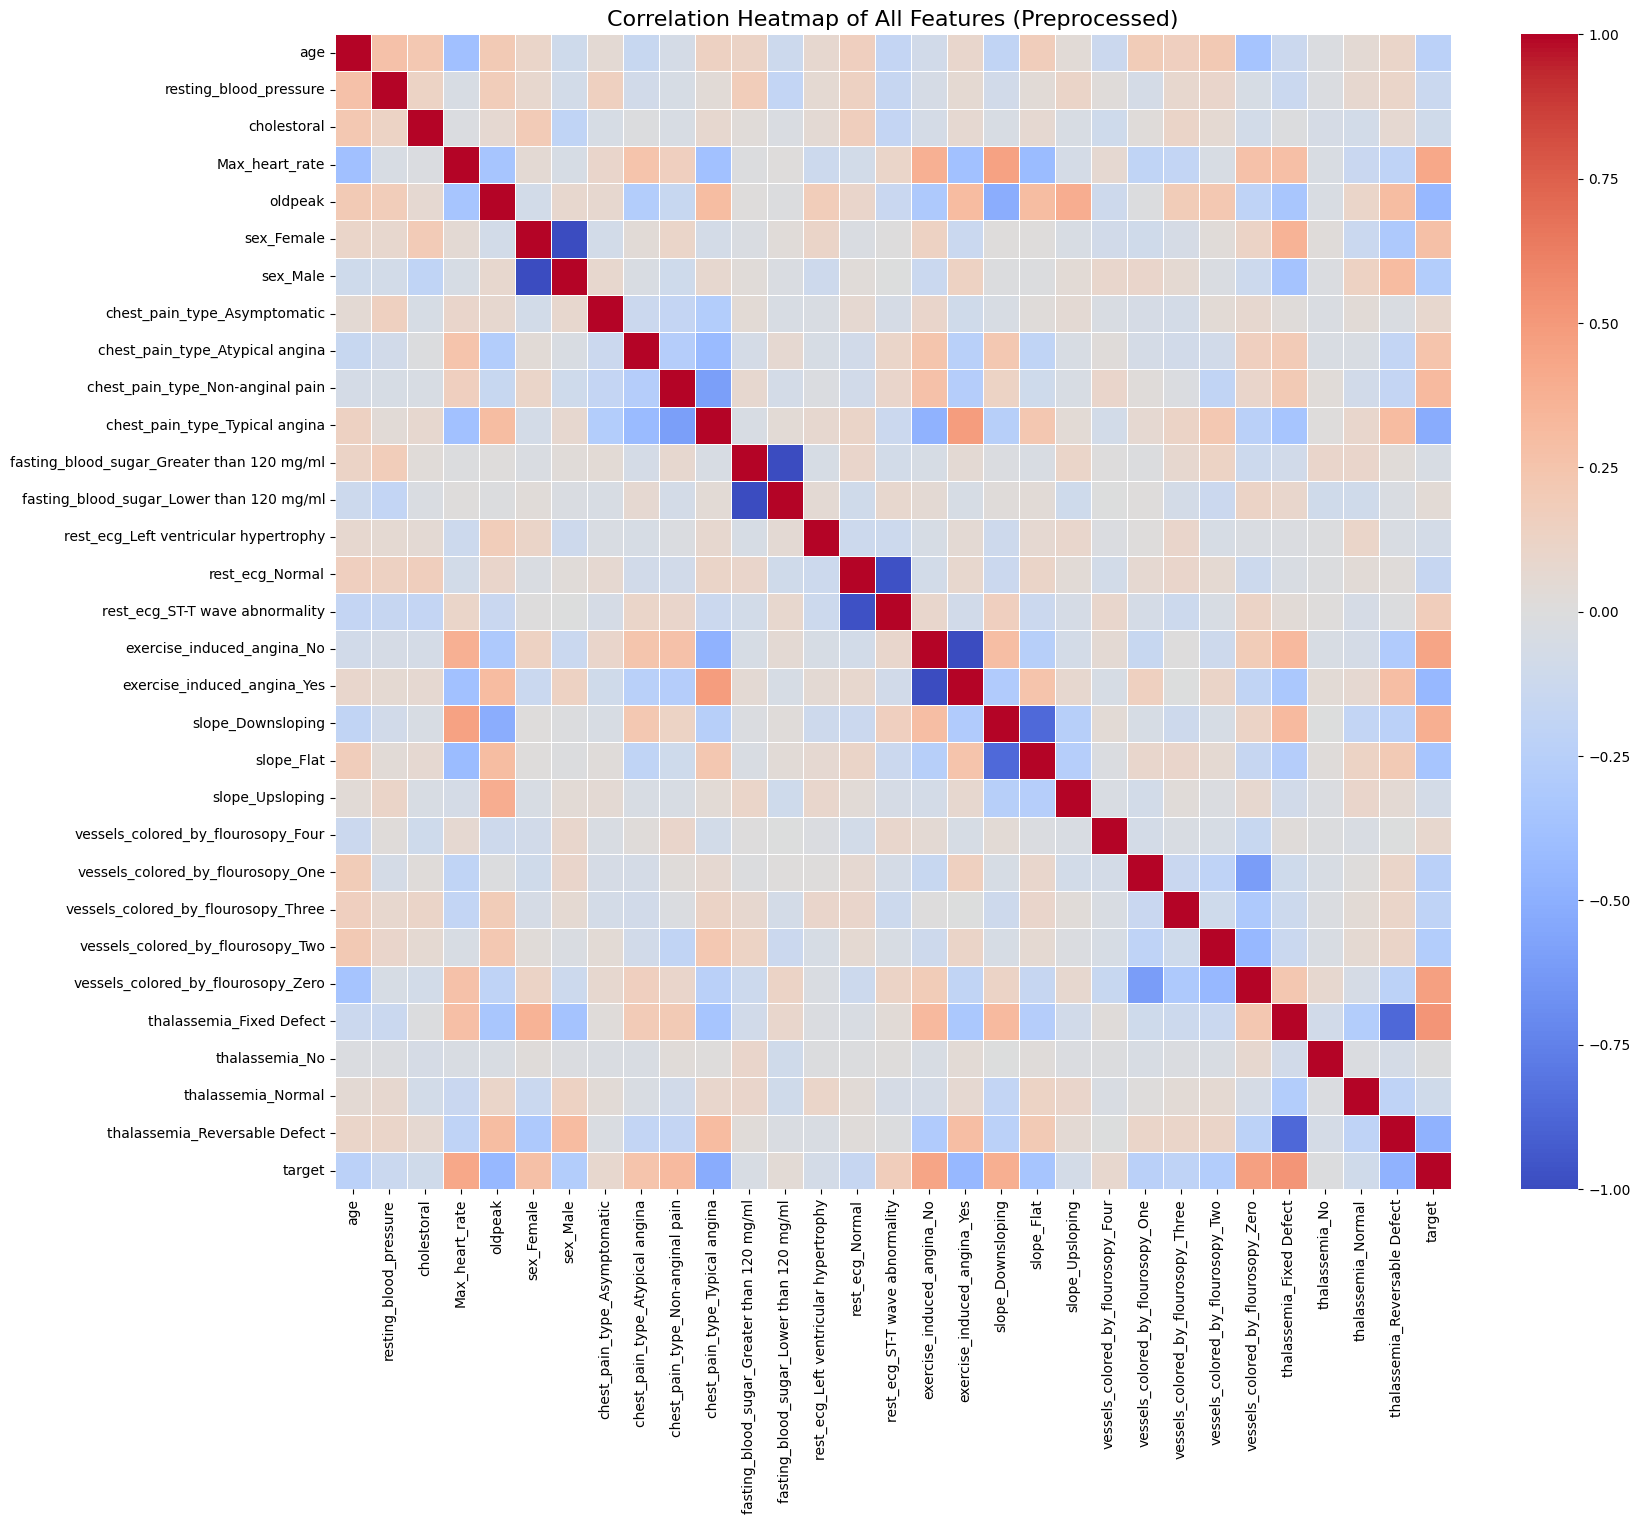

In [14]:
print("Generating Correlation Heatmap...")
plt.figure(figsize=(18, 15))
correlation_matrix = df_final_preprocessed.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Features (Preprocessed)', fontsize=16)
plt.show()

In [15]:
print("\nPerforming Chi-square tests for categorical features vs. target...")
print("Significance level: 0.05")
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['target'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Feature: {col}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  -> Significant association with target (reject H0)")
    else:
        print(f"  -> No significant association with target (fail to reject H0)")

print("\nConducting t-tests for numerical features vs. target...")
print("Significance level: 0.05")
for col in numerical_features_to_scale:
    group_0 = df_final_preprocessed[df_final_preprocessed['target'] == 0][col]
    group_1 = df_final_preprocessed[df_final_preprocessed['target'] == 1][col]

    # Perform independent samples t-test
    if len(group_0) > 1 and len(group_1) > 1:
        t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
        print(f"Feature: {col}, P-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"  -> Significant difference in means between target groups (reject H0)")
        else:
            print(f"  -> No significant difference in means between target groups (fail to reject H0)")
    else:
        print(f"Feature: {col}: Insufficient data in one or both groups for t-test.")



Performing Chi-square tests for categorical features vs. target...
Significance level: 0.05
Feature: sex, P-value: 0.0000
  -> Significant association with target (reject H0)
Feature: chest_pain_type, P-value: 0.0000
  -> Significant association with target (reject H0)
Feature: fasting_blood_sugar, P-value: 0.2186
  -> No significant association with target (fail to reject H0)
Feature: rest_ecg, P-value: 0.0000
  -> Significant association with target (reject H0)
Feature: exercise_induced_angina, P-value: 0.0000
  -> Significant association with target (reject H0)
Feature: slope, P-value: 0.0000
  -> Significant association with target (reject H0)
Feature: vessels_colored_by_flourosopy, P-value: 0.0000
  -> Significant association with target (reject H0)
Feature: thalassemia, P-value: 0.0000
  -> Significant association with target (reject H0)

Conducting t-tests for numerical features vs. target...
Significance level: 0.05
Feature: age, P-value: 0.0000
  -> Significant difference in 

In [16]:
X = df_final_preprocessed.drop('target', axis=1)
y = df_final_preprocessed['target']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 values of y:")
print(y.head())

Features (X) shape: (1025, 30)
Target (y) shape: (1025,)
First 5 rows of X:
        age  resting_blood_pressure  cholestoral  Max_heart_rate   oldpeak  \
0 -0.268437               -0.377636    -0.659332        0.821321 -0.060888   
1 -0.158157                0.479107    -0.833861        0.255968  1.727137   
2  1.716595                0.764688    -1.396233       -1.048692  1.301417   
3  0.724079                0.936037    -0.833861        0.516900 -0.912329   
4  0.834359                0.364875     0.930822       -1.874977  0.705408   

   sex_Female  sex_Male  chest_pain_type_Asymptomatic  \
0         0.0       1.0                           0.0   
1         0.0       1.0                           0.0   
2         0.0       1.0                           0.0   
3         0.0       1.0                           0.0   
4         1.0       0.0                           0.0   

   chest_pain_type_Atypical angina  chest_pain_type_Non-anginal pain  ...  \
0                              0.0 

Applying PCA...


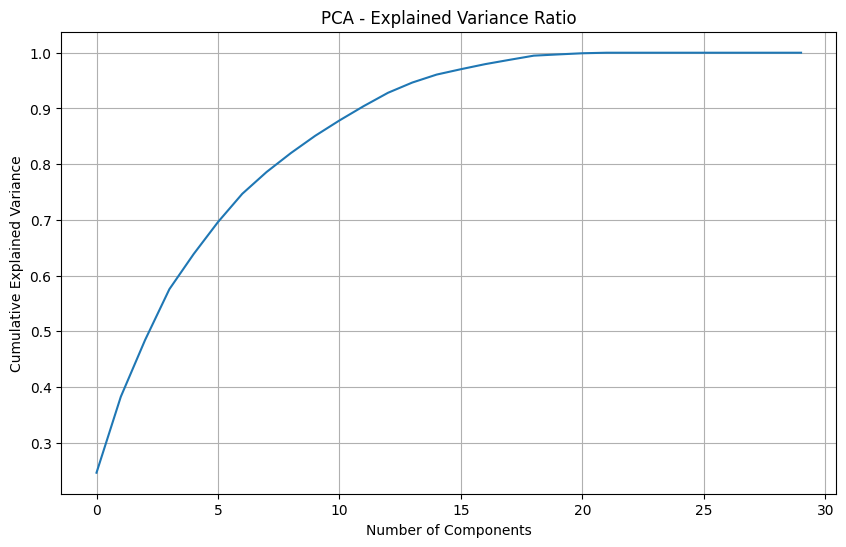

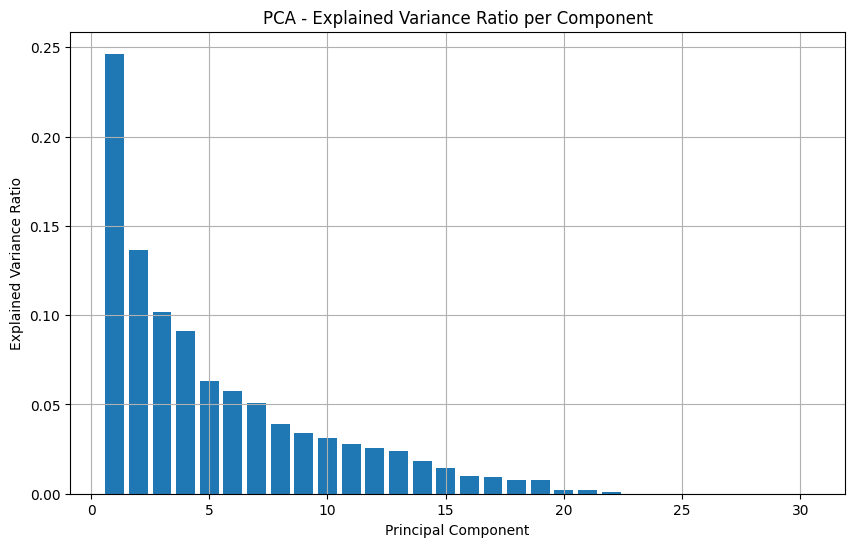

Shape of X_pca: (1025, 30)


In [17]:
print("Applying PCA...")
pca = PCA(n_components=None) # Keep all components initially to calculate explained variance
X_pca = pca.fit_transform(X)

# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio per Component')
plt.grid(True)
plt.show()

print(f"Shape of X_pca: {X_pca.shape}")

In [18]:
print("Applying LDA...")
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

print(f"Shape of X_lda: {X_lda.shape}")

Applying LDA...
Shape of X_lda: (1025, 1)


Generating density plot for the single LDA component...


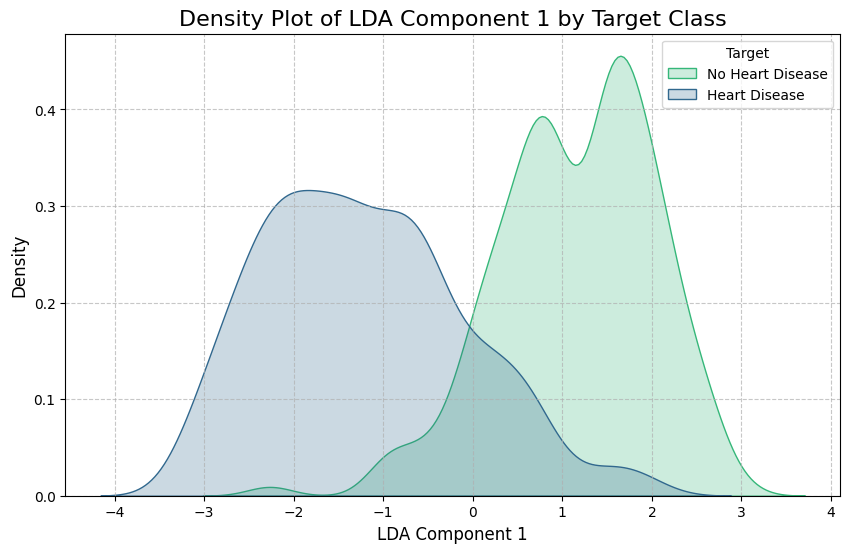

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Generating density plot for the single LDA component...")

# Create a DataFrame for easier plotting, combining X_lda and y
lda_df = pd.DataFrame({
    'LDA Component 1': X_lda.flatten(), # Flatten X_lda as it's a 2D array with one column
    'Target': y
})

plt.figure(figsize=(10, 6))
sns.kdeplot(data=lda_df, x='LDA Component 1', hue='Target', fill=True, common_norm=False, palette='viridis')
plt.title('Density Plot of LDA Component 1 by Target Class', fontsize=16)
plt.xlabel('LDA Component 1', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Model Implementations and Model evaluations

In [20]:
print("1. Splitting original features (X, y) into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print("\n2. Splitting PCA-transformed features (X_pca, y) into training and testing sets...")
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)
print(f"X_pca_train shape: {X_pca_train.shape}, y_pca_train shape: {y_pca_train.shape}")
print(f"X_pca_test shape: {X_pca_test.shape}, y_pca_test shape: {y_pca_test.shape}")

print("\n3. Splitting LDA-transformed features (X_lda, y) into training and testing sets...")
X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(X_lda, y, test_size=0.2, stratify=y, random_state=42)
print(f"X_lda_train shape: {X_lda_train.shape}, y_lda_train shape: {y_lda_train.shape}")
print(f"X_lda_test shape: {X_lda_test.shape}, y_lda_test shape: {y_lda_test.shape}")

print("\n4. Initializing Stratified K-Fold cross-validation...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("StratifiedKFold object created with 5 splits.")

1. Splitting original features (X, y) into training and testing sets...
X_train shape: (820, 30), y_train shape: (820,)
X_test shape: (205, 30), y_test shape: (205,)

2. Splitting PCA-transformed features (X_pca, y) into training and testing sets...
X_pca_train shape: (820, 30), y_pca_train shape: (820,)
X_pca_test shape: (205, 30), y_pca_test shape: (205,)

3. Splitting LDA-transformed features (X_lda, y) into training and testing sets...
X_lda_train shape: (820, 1), y_lda_train shape: (820,)
X_lda_test shape: (205, 1), y_lda_test shape: (205,)

4. Initializing Stratified K-Fold cross-validation...
StratifiedKFold object created with 5 splits.


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_and_plot_model(model, X_test, y_test, model_name):
    print(f"\n--- Evaluating {model_name} ---")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    fig_cm, ax_cm = plt.subplots(figsize=(6, 5))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', ax=ax_cm)
    ax_cm.set_title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fig_roc, ax_roc = plt.subplots(figsize=(6, 5))
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_probs = model.decision_function(X_test)
    else:
        y_probs = y_pred # Fallback for models without proba/decision_function

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    RocCurveDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=ax_roc)
    ax_roc.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
    ax_roc.set_title(f'ROC Curve - {model_name} (AUC = {roc_auc:.2f})')
    ax_roc.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


Training and evaluating Gaussian Naive Bayes model...

--- Evaluating Gaussian Naive Bayes ---
Accuracy: 0.8244
Precision: 0.8108
Recall: 0.8571
F1-Score: 0.8333


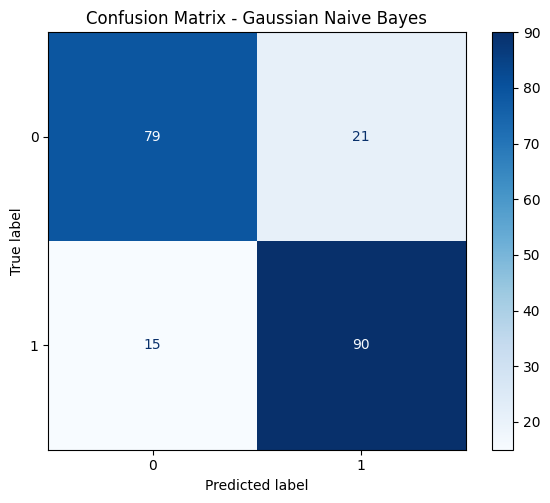

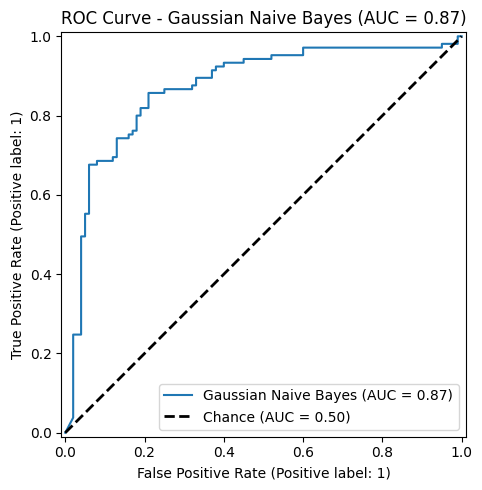

In [22]:
print("Training and evaluating Gaussian Naive Bayes model...")
gnb = GaussianNB()
gnb.fit(X_train, y_train)

evaluate_and_plot_model(gnb, X_test, y_test, 'Gaussian Naive Bayes')

Training and evaluating Complement Naive Bayes model...

--- Evaluating Complement Naive Bayes ---
Accuracy: 0.8293
Precision: 0.8365
Recall: 0.8286
F1-Score: 0.8325


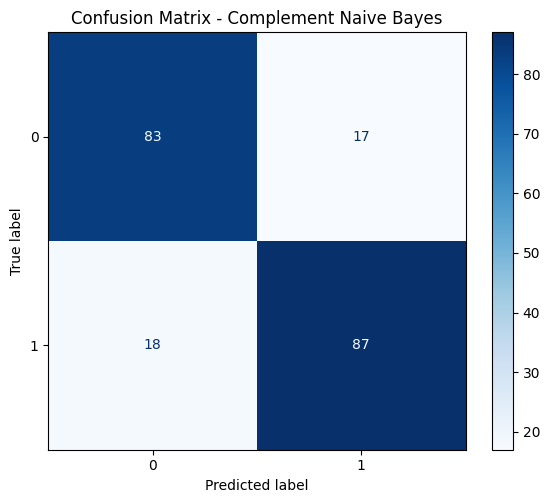

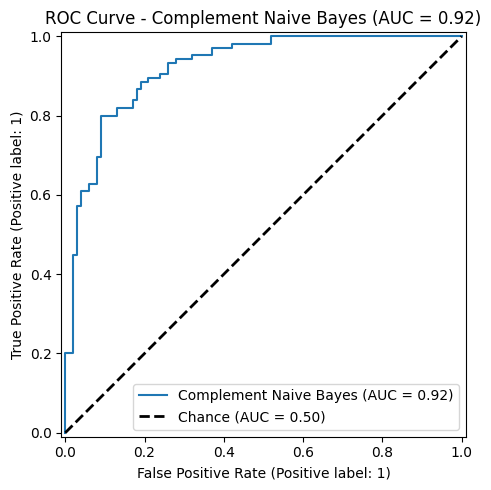

In [23]:
from sklearn.preprocessing import MinMaxScaler

print("Training and evaluating Complement Naive Bayes model...")
cnb = ComplementNB()

min_max_scaler = MinMaxScaler()
X_train_cnb = min_max_scaler.fit_transform(X_train)
X_test_cnb = min_max_scaler.transform(X_test)

cnb.fit(X_train_cnb, y_train)

evaluate_and_plot_model(cnb, X_test_cnb, y_test, 'Complement Naive Bayes')

Training and evaluating Decision Tree Classifier (Default)...

--- Evaluating Decision Tree Classifier (Default) ---
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9714
F1-Score: 0.9855


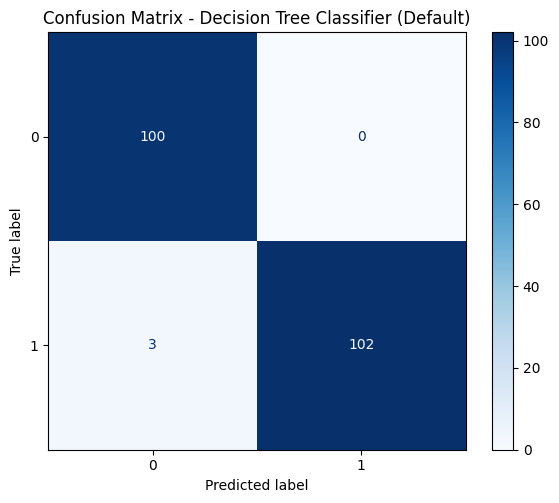

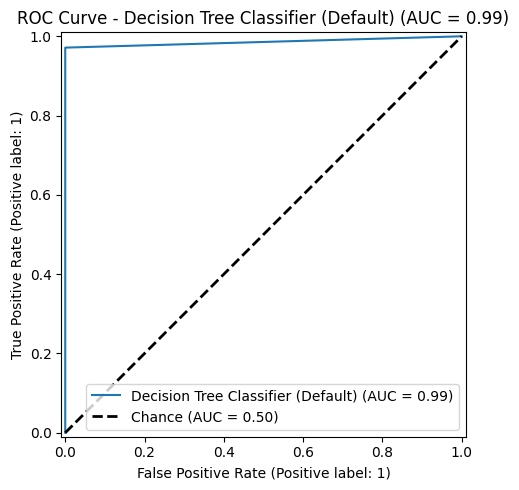

In [24]:
print("Training and evaluating Decision Tree Classifier (Default)...")
dtc_default = DecisionTreeClassifier(random_state=42)
dtc_default.fit(X_train, y_train)

evaluate_and_plot_model(dtc_default, X_test, y_test, 'Decision Tree Classifier (Default)')

Training and evaluating Decision Tree Classifier (Max Depth 5)...

--- Evaluating Decision Tree Classifier (Max Depth 5) ---
Accuracy: 0.8878
Precision: 0.8796
Recall: 0.9048
F1-Score: 0.8920


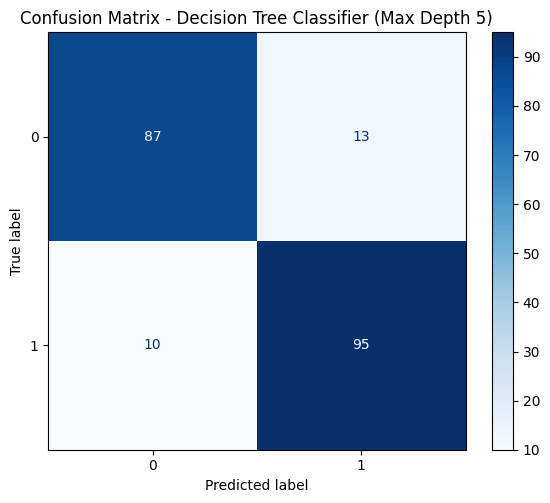

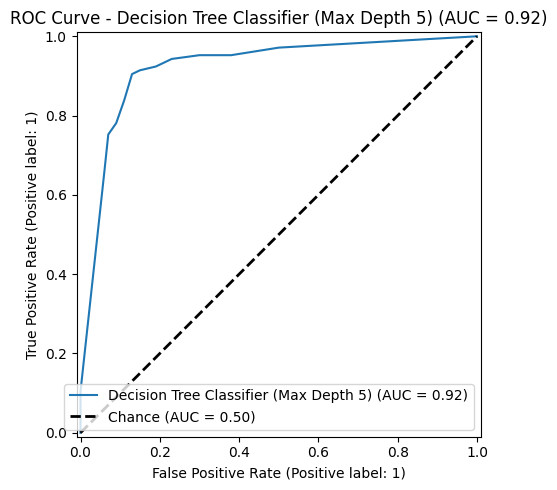

In [25]:
print("Training and evaluating Decision Tree Classifier (Max Depth 5)...")
dtc_max_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc_max_depth_5.fit(X_train, y_train)

evaluate_and_plot_model(dtc_max_depth_5, X_test, y_test, 'Decision Tree Classifier (Max Depth 5)')

Training and evaluating K-Nearest Neighbors (k=5) model...

--- Evaluating K-Nearest Neighbors (k=5) ---
Accuracy: 0.8634
Precision: 0.8468
Recall: 0.8952
F1-Score: 0.8704


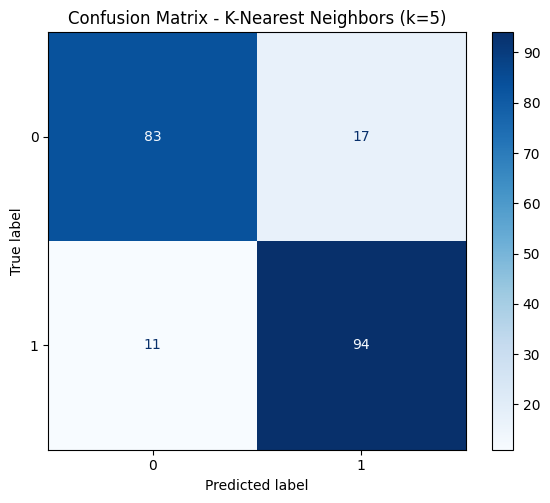

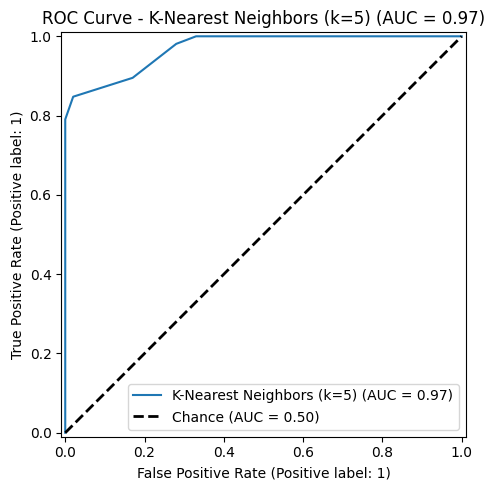

In [26]:
print("Training and evaluating K-Nearest Neighbors (k=5) model...")
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

evaluate_and_plot_model(knn_5, X_test, y_test, 'K-Nearest Neighbors (k=5)')

Training and evaluating K-Nearest Neighbors (k=10) model...

--- Evaluating K-Nearest Neighbors (k=10) ---
Accuracy: 0.8634
Precision: 0.8532
Recall: 0.8857
F1-Score: 0.8692


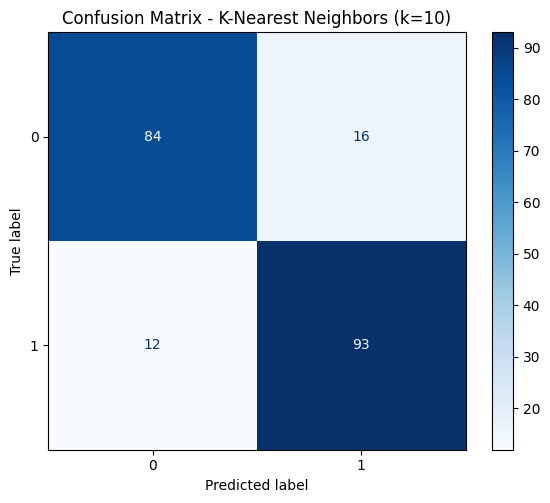

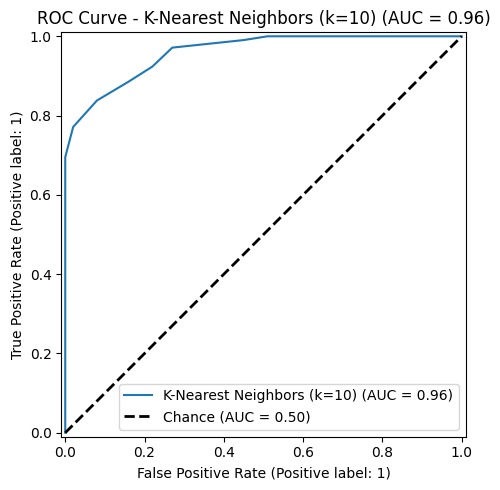

In [27]:
print("Training and evaluating K-Nearest Neighbors (k=10) model...")
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)

evaluate_and_plot_model(knn_10, X_test, y_test, 'K-Nearest Neighbors (k=10)')

Training and evaluating PCA Classifier model...

--- Evaluating PCA Classifier ---
Accuracy: 0.8732
Precision: 0.8559
Recall: 0.9048
F1-Score: 0.8796


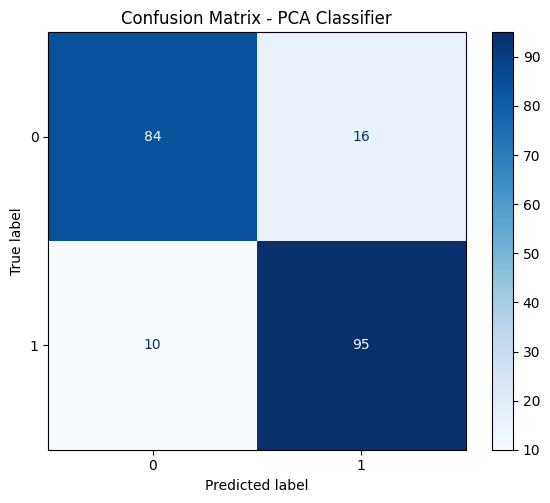

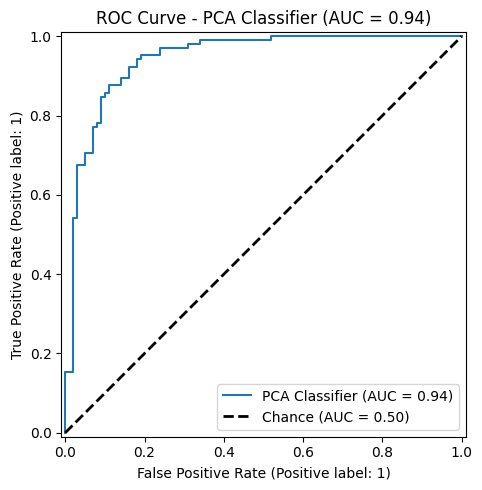

In [28]:
print("Training and evaluating PCA Classifier model...")
log_reg_pca = LogisticRegression(solver='liblinear', random_state=42)
log_reg_pca.fit(X_pca_train, y_pca_train)

evaluate_and_plot_model(log_reg_pca, X_pca_test, y_pca_test, 'PCA Classifier')

Training and evaluating LDA Classifier model...

--- Evaluating LDA Classifier ---
Accuracy: 0.8976
Precision: 0.8818
Recall: 0.9238
F1-Score: 0.9023


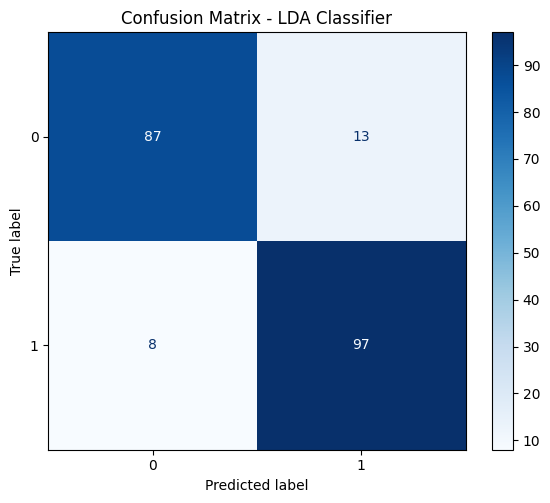

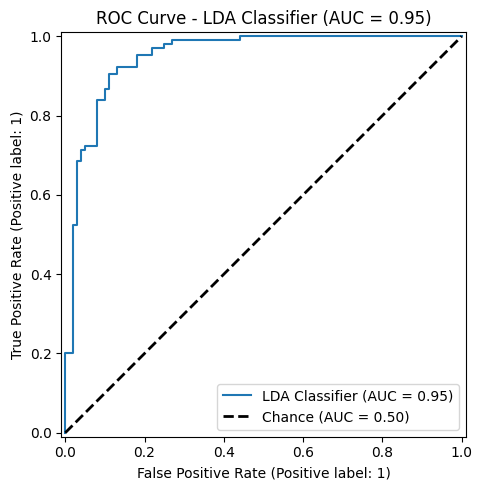

In [29]:
print("Training and evaluating LDA Classifier model...")
log_reg_lda = LogisticRegression(solver='liblinear', random_state=42)
log_reg_lda.fit(X_lda_train, y_lda_train)

evaluate_and_plot_model(log_reg_lda, X_lda_test, y_lda_test, 'LDA Classifier')

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

print("TensorFlow, Sequential, Dense, and Dropout imported successfully.")

TensorFlow, Sequential, Dense, and Dropout imported successfully.


In [31]:
print("Defining the TensorFlow neural network model...")

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

print("Neural network model defined successfully.")
model.summary()

Defining the TensorFlow neural network model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural network model defined successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
print("Compiling the TensorFlow neural network model...")

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Neural network model compiled successfully.")

Compiling the TensorFlow neural network model...
Neural network model compiled successfully.


In [33]:
print("Training the TensorFlow neural network model...")

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("Neural network model trained successfully.")


Training the TensorFlow neural network model...
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5916 - loss: 0.6550 - val_accuracy: 0.7927 - val_loss: 0.4890
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8298 - loss: 0.4639 - val_accuracy: 0.8171 - val_loss: 0.4042
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8640 - loss: 0.3445 - val_accuracy: 0.8476 - val_loss: 0.3761
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8621 - loss: 0.3237 - val_accuracy: 0.8415 - val_loss: 0.3618
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8764 - loss: 0.2933 - val_accuracy: 0.8537 - val_loss: 0.3516
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9133 - loss: 0.2499 - val_accuracy: 0.8598 - val_loss: 0.3423
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8832 - loss: 0.2848 - val_accuracy: 0.8659 - val_loss: 0.3310
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.909

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


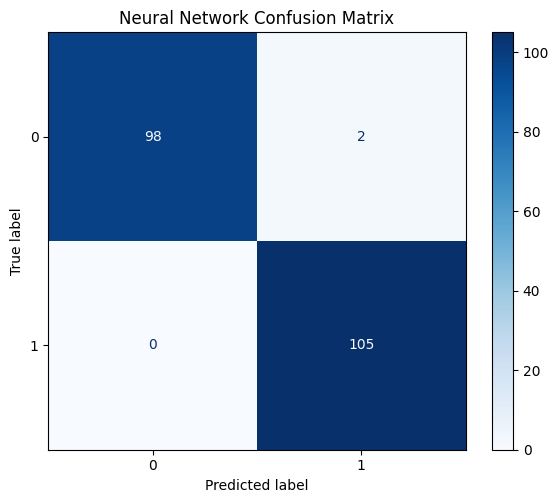


--- Neural Network Performance ---
Accuracy: 0.9902
Precision: 0.9813
Recall: 1.0000
F1-Score: 0.9906
AUC: 1.0000


In [34]:
y_pred_nn_proba = model.predict(X_test)
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)

fig_cm_nn, ax_cm_nn = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn, cmap='Blues', ax=ax_cm_nn)
ax_cm_nn.set_title("Neural Network Confusion Matrix")
plt.tight_layout()
plt.show()

accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_proba)
roc_auc_nn = auc(fpr_nn, tpr_nn)

print("\n--- Neural Network Performance ---")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_nn:.4f}")
print(f"AUC: {roc_auc_nn:.4f}")

In [35]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

print("Preparing data for Bayesian Network...")

df_bn = df.copy()

numerical_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
target_col = 'target'

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile', subsample=None, random_state=42)
df_bn[numerical_cols] = discretizer.fit_transform(df_bn[numerical_cols])

for col in numerical_cols:
    df_bn[col] = df_bn[col].astype(int)

label_encoders = {}
for col in categorical_cols + [target_col]:
    le = LabelEncoder()
    df_bn[col] = le.fit_transform(df_bn[col])
    label_encoders[col] = le

print("Data preparation complete. First 5 rows of the prepared data for BBN:")
print(df_bn.head())

Preparing data for Bayesian Network...
Data preparation complete. First 5 rows of the prepared data for BBN:
   age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0    1    1                3                       1            0   
1    1    1                3                       2            0   
2    2    1                3                       2            0   
3    2    1                3                       2            0   
4    2    0                3                       2            2   

   fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                    1         2               2                        0   
1                    0         1               1                        1   
2                    1         2               0                        1   
3                    1         2               1                        0   
4                    0         2               0                        0   

   oldpeak  s

In [36]:
print("Defining Bayesian Network structure and learning parameters...")

model_structure = [
    ('age', 'target'),
    ('sex', 'target'),
    ('chest_pain_type', 'target'),
    ('Max_heart_rate', 'target'),
    ('oldpeak', 'target'),
    ('thalassemia', 'target'),
    ('vessels_colored_by_flourosopy', 'target'),
    ('slope', 'target'),
    ('exercise_induced_angina', 'target'),
    ('resting_blood_pressure', 'Max_heart_rate'),
    ('cholestoral', 'Max_heart_rate'),
    ('chest_pain_type', 'exercise_induced_angina'),
    ('sex', 'thalassemia'),
    ('fasting_blood_sugar', 'target'),
    ('rest_ecg', 'target')
]

model = DiscreteBayesianNetwork(model_structure)

model.fit(df_bn, estimator=BayesianEstimator)

print("Bayesian Network structure defined and parameters learned successfully.")

Defining Bayesian Network structure and learning parameters...
Bayesian Network structure defined and parameters learned successfully.


Visualizing the Bayesian Network structure...


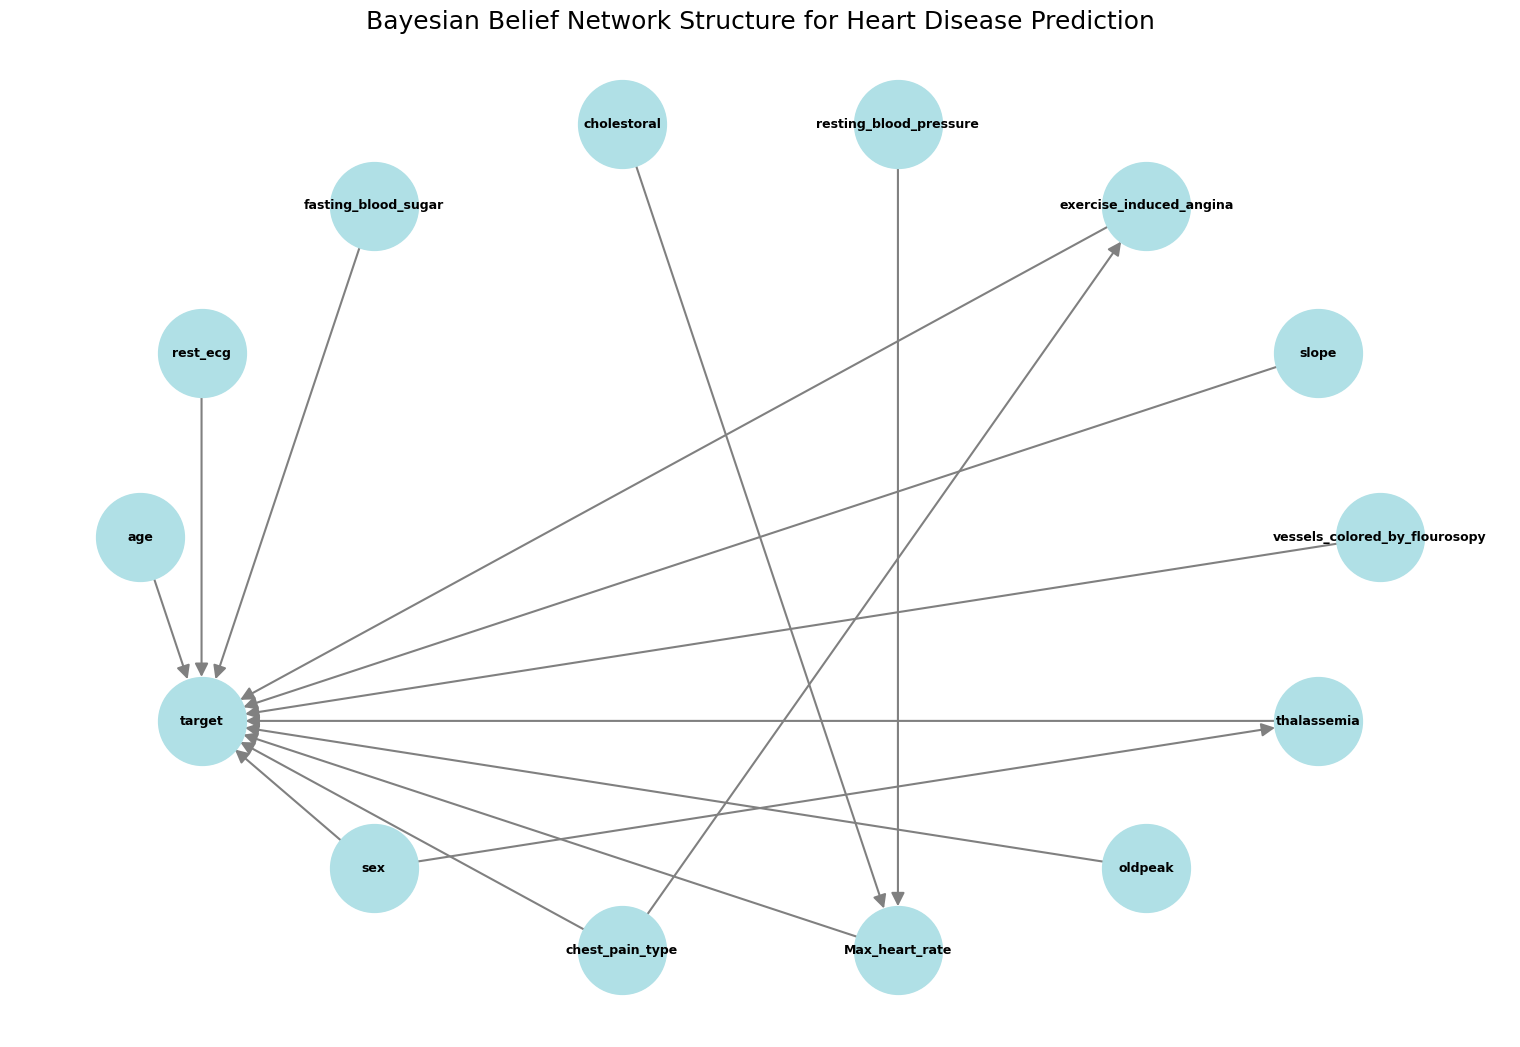

In [37]:
print("Visualizing the Bayesian Network structure...")

plt.figure(figsize=(15, 10))
pos = nx.shell_layout(model)
nx.draw(model, pos, with_labels=True, node_size=4000, node_color="#b0e0e6",
        font_size=9, font_weight='bold', width=1.5, arrowsize=20,
        edge_color='gray', node_shape='o')

plt.title("Bayesian Belief Network Structure for Heart Disease Prediction", size=18)
plt.show()

In [38]:
print("Performing a simple inference query on the Bayesian Network...")

inference = VariableElimination(model)

age_highest_bin_encoded = 2

sex_male_encoded = None
if 'sex' in label_encoders and 'Male' in label_encoders['sex'].classes_:
    sex_male_encoded = label_encoders['sex'].transform(['Male'])[0]
else:
    if len(label_encoders['sex'].classes_) > 1:
        sex_male_encoded = 1
    else:
        sex_male_encoded = 0

chest_pain_type_asymptomatic_encoded = None
if 'chest_pain_type' in label_encoders and 'Asymptomatic' in label_encoders['chest_pain_type'].classes_:
    chest_pain_type_asymptomatic_encoded = label_encoders['chest_pain_type'].transform(['Asymptomatic'])[0]
else:
    print("Warning: 'Asymptomatic' not found in chest_pain_type classes. Using default 0.")
    chest_pain_type_asymptomatic_encoded = 0

if sex_male_encoded is not None and chest_pain_type_asymptomatic_encoded is not None:
    query_result = inference.query(
        variables=['target'],
        evidence={
            'age': age_highest_bin_encoded,
            'sex': sex_male_encoded,
            'chest_pain_type': chest_pain_type_asymptomatic_encoded
        }
    )
    print(f"""\nProbability of Heart Disease (target) given:
    Age (highest bin): {age_highest_bin_encoded}
    Sex: {label_encoders['sex'].inverse_transform([sex_male_encoded])[0]}
    Chest Pain Type: {label_encoders['chest_pain_type'].inverse_transform([chest_pain_type_asymptomatic_encoded])[0]}""")
    print(query_result)
else:
    print("Skipping inference due to missing encoded values.")

Performing a simple inference query on the Bayesian Network...

Probability of Heart Disease (target) given:
    Age (highest bin): 2
    Sex: Male
    Chest Pain Type: Asymptomatic
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5020 |
+-----------+---------------+
| target(1) |        0.4980 |
+-----------+---------------+



Updated Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Gaussian Naive Bayes,0.824390,0.810811,0.857143,0.833333,0.870762
1,Complement Naive Bayes,0.829268,0.836538,0.828571,0.832536,0.921048
2,Decision Tree (Default),0.985366,1.000000,0.971429,0.985507,0.985714
3,Decision Tree (Max Depth 5),0.887805,0.879630,0.904762,0.892019,0.921952
4,KNN (k=5),0.863415,0.846847,0.895238,0.870370,0.969810
5,KNN (k=10),0.863415,0.853211,0.885714,0.869159,0.959857
6,PCA Classifier,0.873171,0.855856,0.904762,0.879630,0.944095
7,LDA Classifier,0.897561,0.881818,0.923810,0.902326,0.949905
8,TensorFlow Neural Network,0.990244,0.981308,1.000000,0.990566,1.000000


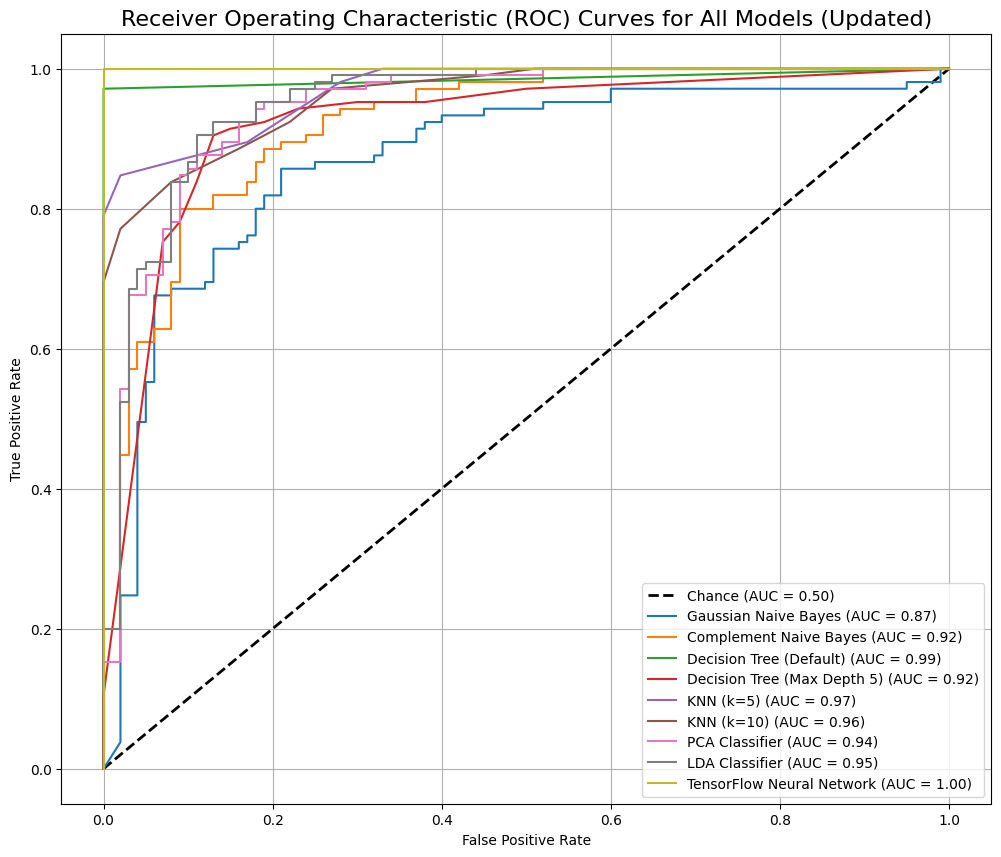

In [39]:
model_results = []
roc_curves_data = []

def get_model_probabilities(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        return model.decision_function(X)
    return None

models_to_evaluate = [
    {'name': 'Gaussian Naive Bayes', 'model': gnb, 'X_test': X_test, 'y_test': y_test},
    {'name': 'Complement Naive Bayes', 'model': cnb, 'X_test': X_test_cnb, 'y_test': y_test},
    {'name': 'Decision Tree (Default)', 'model': dtc_default, 'X_test': X_test, 'y_test': y_test},
    {'name': 'Decision Tree (Max Depth 5)', 'model': dtc_max_depth_5, 'X_test': X_test, 'y_test': y_test},
    {'name': 'KNN (k=5)', 'model': knn_5, 'X_test': X_test, 'y_test': y_test},
    {'name': 'KNN (k=10)', 'model': knn_10, 'X_test': X_test, 'y_test': y_test},
    {'name': 'PCA Classifier', 'model': log_reg_pca, 'X_test': X_pca_test, 'y_test': y_pca_test},
    {'name': 'LDA Classifier', 'model': log_reg_lda, 'X_test': X_lda_test, 'y_test': y_lda_test}
]

for entry in models_to_evaluate:
    model_name = entry['name']
    model = entry['model']
    X_test_model = entry['X_test']
    y_test_model = entry['y_test']

    y_pred = model.predict(X_test_model)
    y_probs = get_model_probabilities(model, X_test_model)

    accuracy = accuracy_score(y_test_model, y_pred)
    precision = precision_score(y_test_model, y_pred)
    recall = recall_score(y_test_model, y_pred)
    f1 = f1_score(y_test_model, y_pred)

    roc_auc = None
    if y_probs is not None:
        fpr, tpr, _ = roc_curve(y_test_model, y_probs)
        roc_auc = auc(fpr, tpr)
        roc_curves_data.append({'name': model_name, 'fpr': fpr, 'tpr': tpr, 'auc': roc_auc})

    model_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': roc_auc
    })

model_results.append({
    'Model': 'TensorFlow Neural Network',
    'Accuracy': accuracy_nn,
    'Precision': precision_nn,
    'Recall': recall_nn,
    'F1-Score': f1_nn,
    'AUC': roc_auc_nn
})

summary_df = pd.DataFrame(model_results)
print("\nUpdated Model Performance Summary:")
display(summary_df)

roc_curves_data.append({
    'name': 'TensorFlow Neural Network',
    'fpr': fpr_nn,
    'tpr': tpr_nn,
    'auc': roc_auc_nn
})

plt.figure(figsize=(12, 10))
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')

for roc_data in roc_curves_data:
    plt.plot(roc_data['fpr'], roc_data['tpr'], label=f"{roc_data['name']} (AUC = {roc_data['auc']:.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for All Models (Updated)', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

Generating Grouped Bar Chart for Model Performance Metrics (including TensorFlow Neural Network).


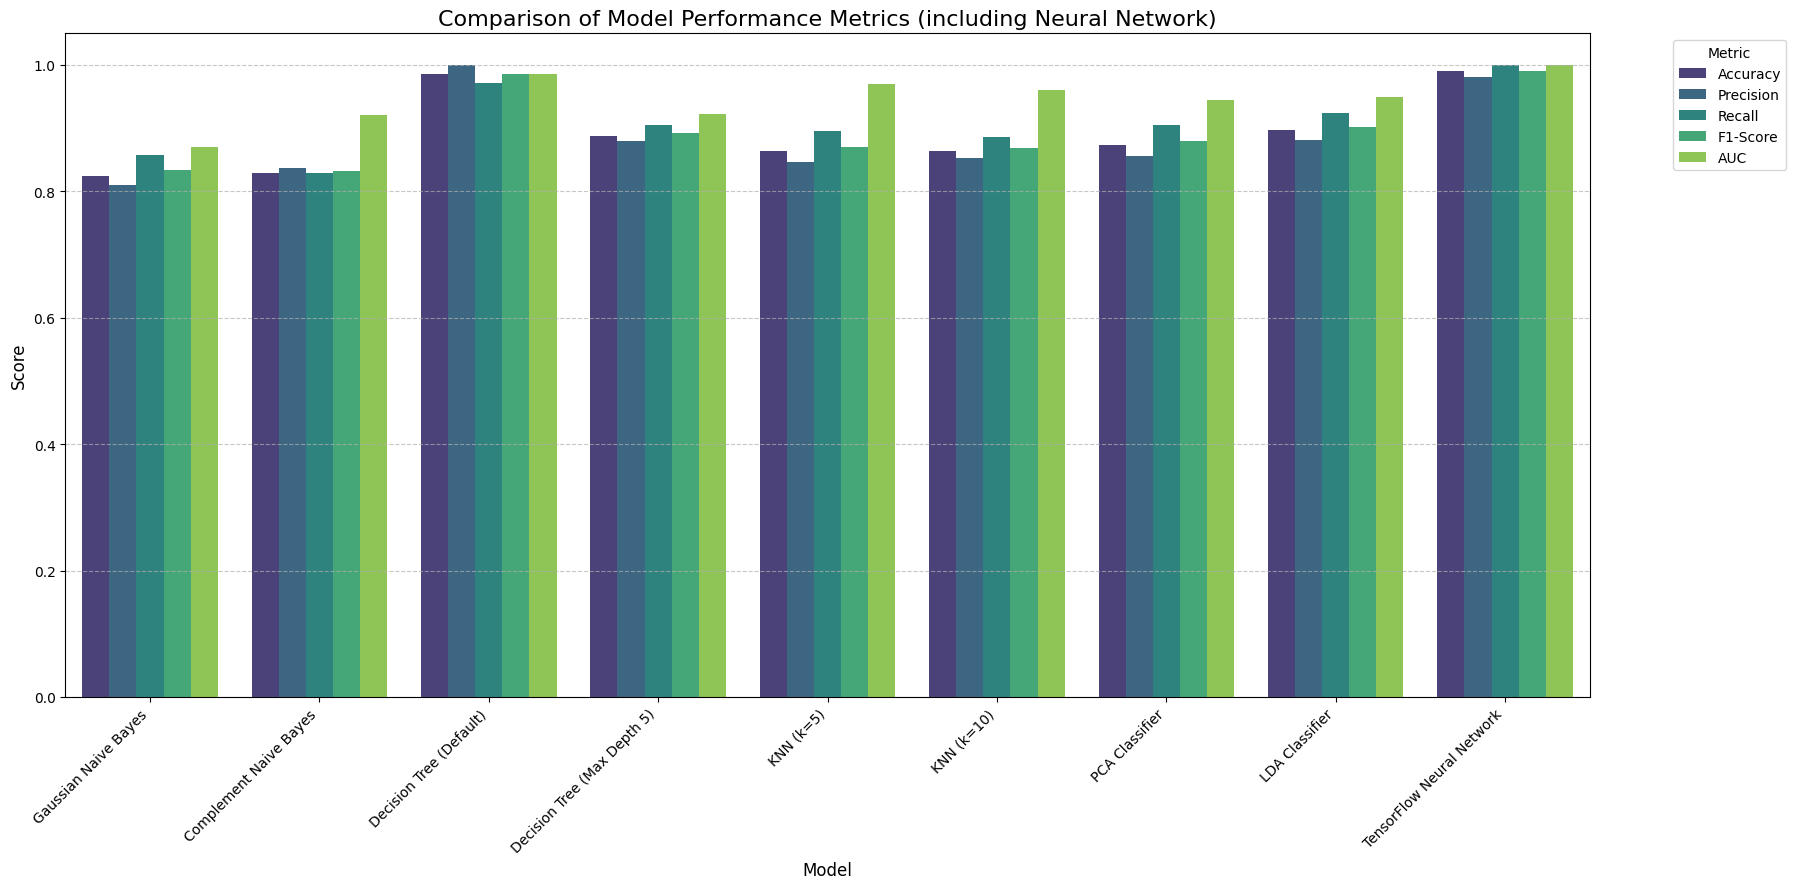

In [40]:
print("Generating Grouped Bar Chart for Model Performance Metrics (including TensorFlow Neural Network).")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

summary_df_melted = summary_df.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(18, 9))
sns.barplot(x='Model', y='Score', hue='Metric', data=summary_df_melted, palette='viridis')

plt.title('Comparison of Model Performance Metrics (including Neural Network)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.0, 1.05)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# K-fold cross validation

In [41]:
from sklearn.model_selection import KFold, cross_val_score

model = DecisionTreeClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Accuracies for each fold:", accuracies)
print("Average accuracy:", accuracies.mean())

Accuracies for each fold: [0.98536585 1.         1.         1.         1.        ]
Average accuracy: 0.9970731707317073


# **LDA and PCA in neural network**

In [42]:
print("Defining the TensorFlow neural network model for PCA-transformed data...")

model_pca = Sequential([
    Dense(128, activation='relu', input_shape=(X_pca_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

print("Neural network model for PCA defined successfully.")
model_pca.summary()

print("\nCompiling the TensorFlow neural network model for PCA-transformed data...")

model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Neural network model for PCA compiled successfully.")

print("\nTraining the TensorFlow neural network model for PCA-transformed data...")

history_pca = model_pca.fit(
    X_pca_train, y_pca_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("Neural network model for PCA trained successfully.")

Defining the TensorFlow neural network model for PCA-transformed data...
Neural network model for PCA defined successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)


Compiling the TensorFlow neural network model for PCA-transformed data...
Neural network model for PCA compiled successfully.

Training the TensorFlow neural network model for PCA-transformed data...
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5825 - loss: 0.6666 - val_accuracy: 0.8049 - val_loss: 0.5332
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8322 - loss: 0.4755 - val_accuracy: 0.8049 - val_loss: 0.4342
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8653 - loss: 0.3772 - val_accuracy: 0.8232 - val_loss: 0.3849
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8764 - loss: 0.3293 - val_accuracy: 0.8598 - val_loss: 0.3598
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8941 - loss: 0.2842 - val_accuracy: 0.8598 - val_loss: 0.3410
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9020 - loss: 0.2736 - val_accuracy: 0.8598 - val_loss: 0.3230
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6

In [43]:
print("Evaluating the TensorFlow neural network model for PCA-transformed data...")

y_pred_nn_pca_proba = model_pca.predict(X_pca_test)
y_pred_nn_pca = (y_pred_nn_pca_proba > 0.5).astype(int)

accuracy_nn_pca = accuracy_score(y_pca_test, y_pred_nn_pca)
precision_nn_pca = precision_score(y_pca_test, y_pred_nn_pca)
recall_nn_pca = recall_score(y_pca_test, y_pred_nn_pca)
f1_nn_pca = f1_score(y_pca_test, y_pred_nn_pca)

fpr_nn_pca, tpr_nn_pca, _ = roc_curve(y_pca_test, y_pred_nn_pca_proba)
roc_auc_nn_pca = auc(fpr_nn_pca, tpr_nn_pca)

print("\n--- Neural Network (PCA) Performance ---")
print(f"Accuracy: {accuracy_nn_pca:.4f}")
print(f"Precision: {precision_nn_pca:.4f}")
print(f"Recall: {recall_nn_pca:.4f}")
print(f"F1-Score: {f1_nn_pca:.4f}")
print(f"AUC: {roc_auc_nn_pca:.4f}")

model_results.append({
    'Model': 'TensorFlow Neural Network (PCA)',
    'Accuracy': accuracy_nn_pca,
    'Precision': precision_nn_pca,
    'Recall': recall_nn_pca,
    'F1-Score': f1_nn_pca,
    'AUC': roc_auc_nn_pca
})

roc_curves_data.append({
    'name': 'TensorFlow Neural Network (PCA)',
    'fpr': fpr_nn_pca,
    'tpr': tpr_nn_pca,
    'auc': roc_auc_nn_pca
})

print("Performance metrics for Neural Network (PCA) added to model_results and roc_curves_data.")

Evaluating the TensorFlow neural network model for PCA-transformed data...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

--- Neural Network (PCA) Performance ---
Accuracy: 0.9902
Precision: 0.9813
Recall: 1.0000
F1-Score: 0.9906
AUC: 1.0000
Performance metrics for Neural Network (PCA) added to model_results and roc_curves_data.


In [44]:
print("Defining the TensorFlow neural network model for LDA-transformed data...")

model_lda = Sequential([
    Dense(128, activation='relu', input_shape=(X_lda_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

print("Neural network model for LDA defined successfully.")
model_lda.summary()

print("\nCompiling the TensorFlow neural network model for LDA-transformed data...")

model_lda.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Neural network model for LDA compiled successfully.")

print("\nTraining the TensorFlow neural network model for LDA-transformed data...")

history_lda = model_lda.fit(
    X_lda_train, y_lda_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("Neural network model for LDA trained successfully.")

Defining the TensorFlow neural network model for LDA-transformed data...
Neural network model for LDA defined successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)


Compiling the TensorFlow neural network model for LDA-transformed data...
Neural network model for LDA compiled successfully.

Training the TensorFlow neural network model for LDA-transformed data...
Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8129 - loss: 0.5800 - val_accuracy: 0.8598 - val_loss: 0.4246
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8789 - loss: 0.3641 - val_accuracy: 0.8598 - val_loss: 0.3589
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8742 - loss: 0.3023 - val_accuracy: 0.8598 - val_loss: 0.3599
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8651 - loss: 0.3104 - val_accuracy: 0.8476 - val_loss: 0.3623
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8681 - loss: 0.2968 - val_accuracy: 0.8415 - val_loss: 0.3643
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8559 - loss: 0.3229 - val_accuracy: 0.8415 - val_loss: 0.3638
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6

In [45]:
print("Evaluating the TensorFlow neural network model for LDA-transformed data...")

y_pred_nn_lda_proba = model_lda.predict(X_lda_test)
y_pred_nn_lda = (y_pred_nn_lda_proba > 0.5).astype(int)

accuracy_nn_lda = accuracy_score(y_lda_test, y_pred_nn_lda)
precision_nn_lda = precision_score(y_lda_test, y_pred_nn_lda)
recall_nn_lda = recall_score(y_lda_test, y_pred_nn_lda)
f1_nn_lda = f1_score(y_lda_test, y_pred_nn_lda)

fpr_nn_lda, tpr_nn_lda, _ = roc_curve(y_lda_test, y_pred_nn_lda_proba)
roc_auc_nn_lda = auc(fpr_nn_lda, tpr_nn_lda)

print("\n--- Neural Network (LDA) Performance ---")
print(f"Accuracy: {accuracy_nn_lda:.4f}")
print(f"Precision: {precision_nn_lda:.4f}")
print(f"Recall: {recall_nn_lda:.4f}")
print(f"F1-Score: {f1_nn_lda:.4f}")
print(f"AUC: {roc_auc_nn_lda:.4f}")

model_results.append({
    'Model': 'TensorFlow Neural Network (LDA)',
    'Accuracy': accuracy_nn_lda,
    'Precision': precision_nn_lda,
    'Recall': recall_nn_lda,
    'F1-Score': f1_nn_lda,
    'AUC': roc_auc_nn_lda
})

roc_curves_data.append({
    'name': 'TensorFlow Neural Network (LDA)',
    'fpr': fpr_nn_lda,
    'tpr': tpr_nn_lda,
    'auc': roc_auc_nn_lda
})

print("Performance metrics for Neural Network (LDA) added to model_results and roc_curves_data.")

Evaluating the TensorFlow neural network model for LDA-transformed data...


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

--- Neural Network (LDA) Performance ---
Accuracy: 0.8878
Precision: 0.8475
Recall: 0.9524
F1-Score: 0.8969
AUC: 0.9499
Performance metrics for Neural Network (LDA) added to model_results and roc_curves_data.



Updated Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Gaussian Naive Bayes,0.824390,0.810811,0.857143,0.833333,0.870762
1,Complement Naive Bayes,0.829268,0.836538,0.828571,0.832536,0.921048
2,Decision Tree (Default),0.985366,1.000000,0.971429,0.985507,0.985714
3,Decision Tree (Max Depth 5),0.887805,0.879630,0.904762,0.892019,0.921952
4,KNN (k=5),0.863415,0.846847,0.895238,0.870370,0.969810
5,KNN (k=10),0.863415,0.853211,0.885714,0.869159,0.959857
6,PCA Classifier,0.873171,0.855856,0.904762,0.879630,0.944095
7,LDA Classifier,0.897561,0.881818,0.923810,0.902326,0.949905
8,TensorFlow Neural Network,0.990244,0.981308,1.000000,0.990566,1.000000
9,TensorFlow Neural Network (PCA),0.990244,0.981308,1.000000,0.990566,1.000000


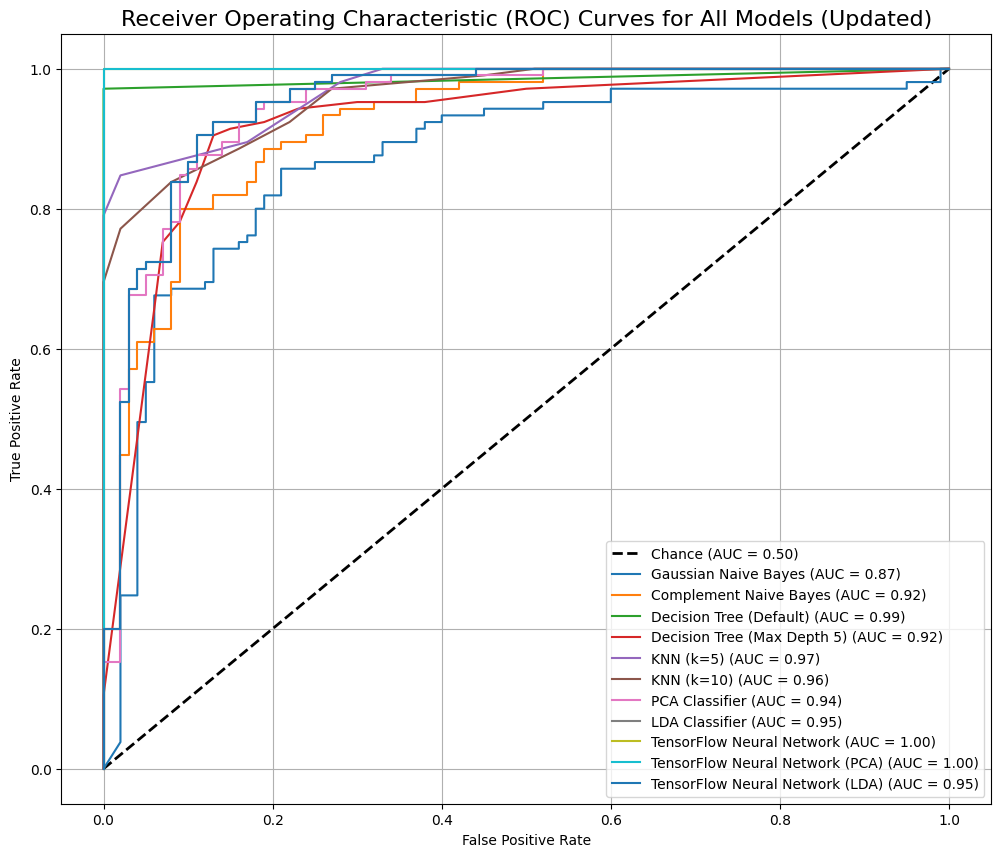

Generating Grouped Bar Chart for Model Performance Metrics (including TensorFlow Neural Network)...


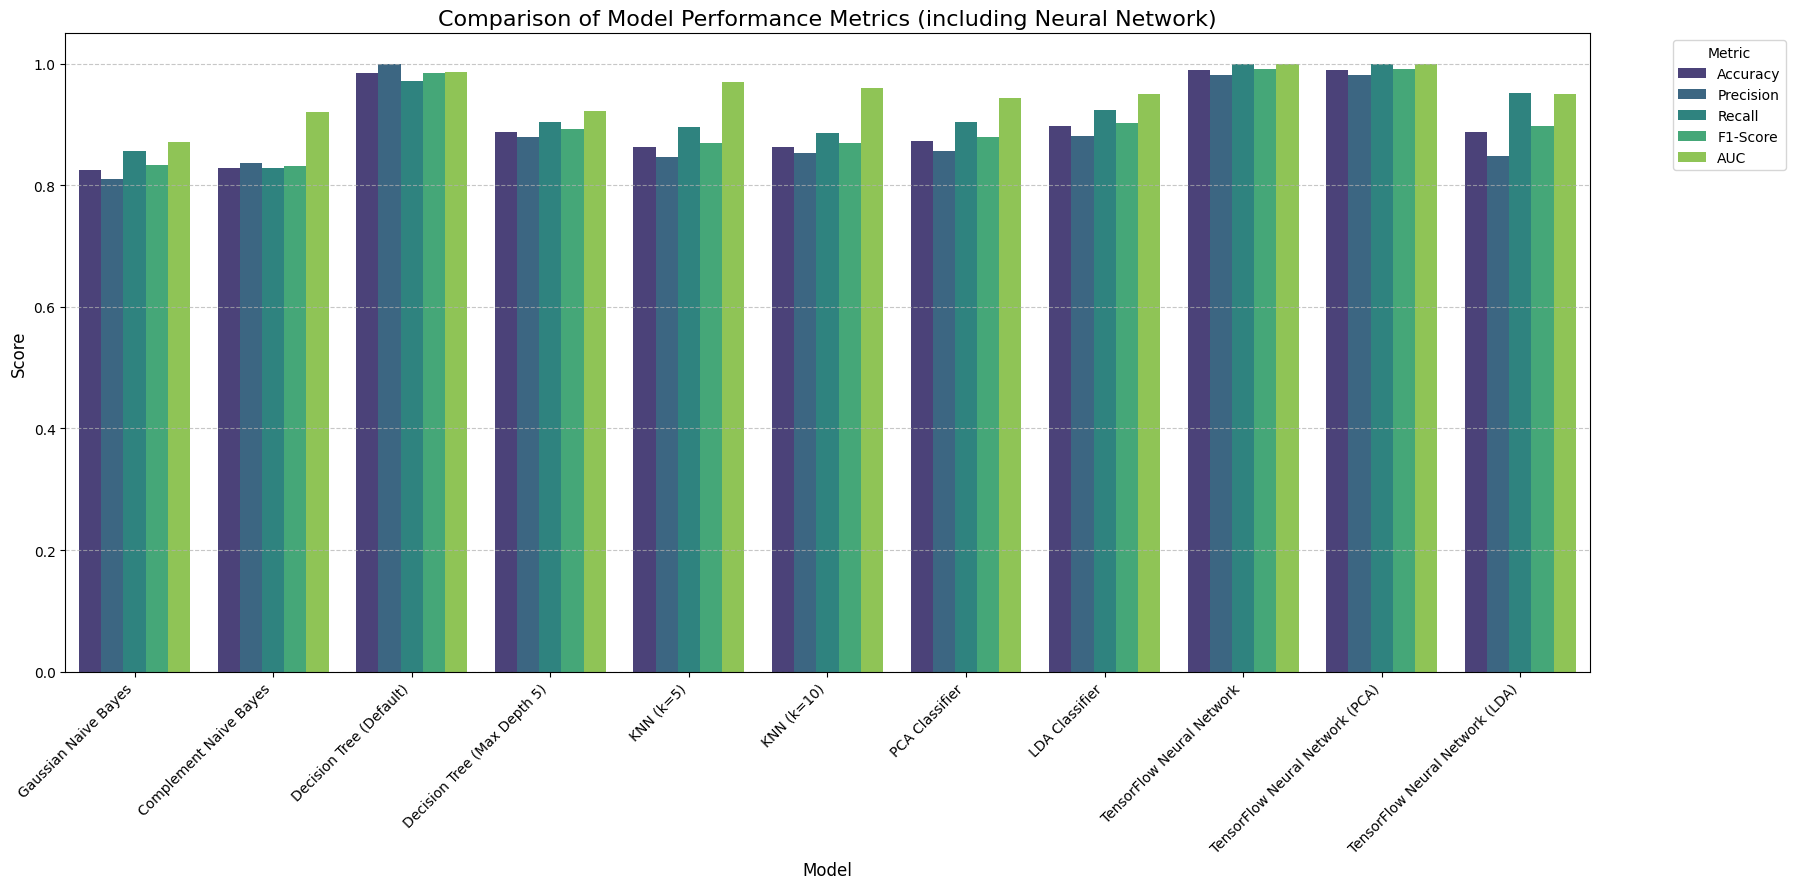

In [46]:
summary_df = pd.DataFrame(model_results)
print("\nUpdated Model Performance Summary:")
display(summary_df)

plt.figure(figsize=(12, 10))
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')

for roc_data in roc_curves_data:
    plt.plot(roc_data['fpr'], roc_data['tpr'], label=f"{roc_data['name']} (AUC = {roc_data['auc']:.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for All Models (Updated)', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

print("Generating Grouped Bar Chart for Model Performance Metrics (including TensorFlow Neural Network)...")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

summary_df_melted = summary_df.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(18, 9))
sns.barplot(x='Model', y='Score', hue='Metric', data=summary_df_melted, palette='viridis')

plt.title('Comparison of Model Performance Metrics (including Neural Network)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.0, 1.05)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
from sklearn.decomposition import TruncatedSVD

print("Applying SVD...")
svd = TruncatedSVD(n_components=X.shape[1], random_state=42)
X_svd = svd.fit_transform(X)

print(f"Shape of X_svd: {X_svd.shape}")
print("First 5 rows of X_svd:")
print(X_svd[:5])

Applying SVD...
Shape of X_svd: (1025, 30)
First 5 rows of X_svd:
[[ 2.15234637e+00  5.86221304e-01 -5.61564504e-01  4.46859082e-01
  -4.45744916e-02 -2.81210685e-01  1.19356325e+00 -7.54410759e-01
   4.64495937e-01  8.97765404e-02 -2.00909731e-01 -7.60130591e-01
   5.26237871e-01  3.44694139e-01 -4.55499330e-01  5.01197600e-01
   1.04120247e-01  1.17900532e-01  1.60797977e-01 -8.20344968e-02
  -6.50118889e-02  5.94847790e-02  9.29631008e-03 -2.49800181e-16
   3.60822483e-16 -3.88578059e-16  1.24900090e-16  4.16333634e-17
   8.32667268e-17 -5.55111512e-17]
 [ 1.49118263e+00 -1.26661447e+00 -9.01981838e-01  1.65506049e+00
  -8.67466461e-01  4.52582150e-03  6.39136732e-01  5.96941552e-01
   5.52177028e-01 -2.82695150e-01 -2.14881424e-01  1.06082068e+00
   7.25114225e-01  2.41261321e-01  4.75965821e-01 -6.31855572e-01
  -1.49109702e-01  4.53251097e-02  5.20587623e-01  1.91741969e-01
   3.13402515e-02 -2.24882993e-02 -2.55041262e-02  1.66533454e-16
  -3.60822483e-16  1.66533454e-16  1.3877

Visualizing explained variance ratio for SVD...


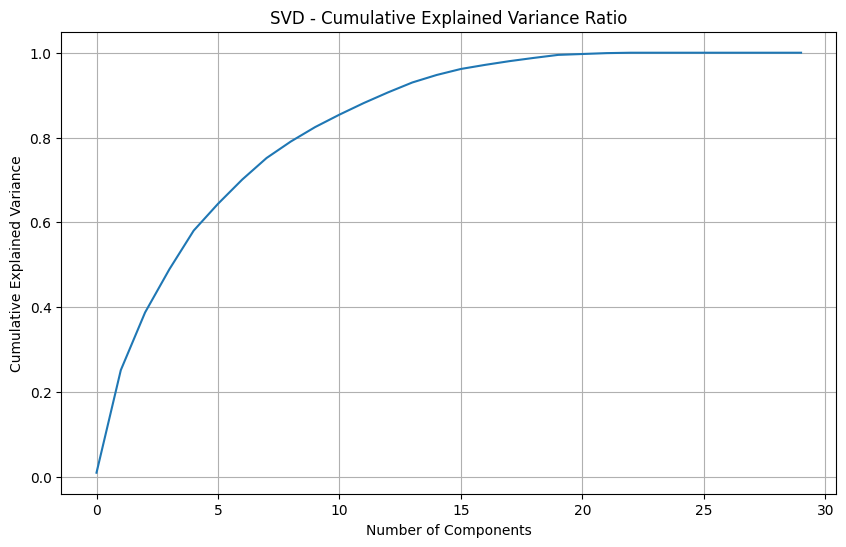

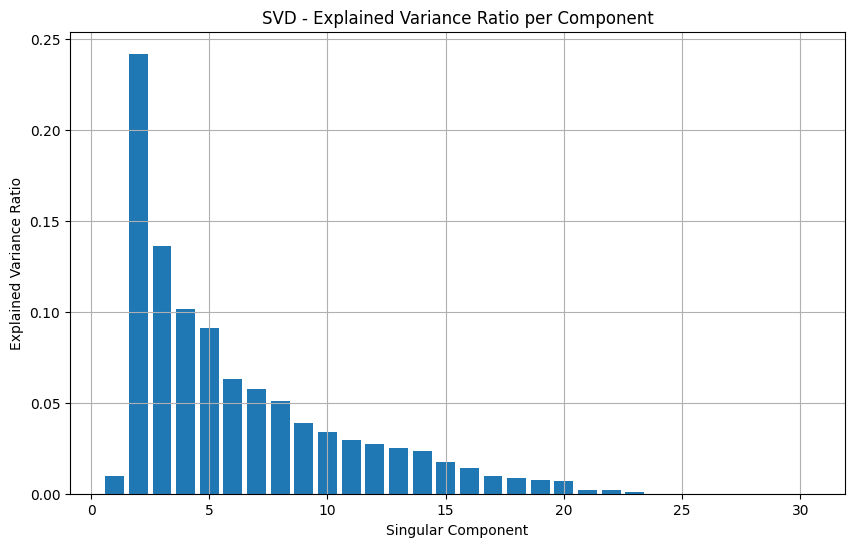

Total explained variance by 30 components: 1.0000


In [48]:
print("Visualizing explained variance ratio for SVD...")

# Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('SVD - Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Explained Variance Ratio per Component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(svd.explained_variance_ratio_) + 1), svd.explained_variance_ratio_)
plt.xlabel('Singular Component')
plt.ylabel('Explained Variance Ratio')
plt.title('SVD - Explained Variance Ratio per Component')
plt.grid(True)
plt.show()

print(f"Total explained variance by {X_svd.shape[1]} components: {np.sum(svd.explained_variance_ratio_):.4f}")

In [49]:
print("Splitting SVD-transformed data into training and testing sets...")
X_svd_train, X_svd_test, y_svd_train, y_svd_test = train_test_split(X_svd, y, test_size=0.2, stratify=y, random_state=42)

print(f"X_svd_train shape: {X_svd_train.shape}, y_svd_train shape: {y_svd_train.shape}")
print(f"X_svd_test shape: {X_svd_test.shape}, y_svd_test shape: {y_svd_test.shape}")

Splitting SVD-transformed data into training and testing sets...
X_svd_train shape: (820, 30), y_svd_train shape: (820,)
X_svd_test shape: (205, 30), y_svd_test shape: (205,)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

print("LinearRegression, mean_squared_error, r2_score, and statsmodels.api imported successfully.")

LinearRegression, mean_squared_error, r2_score, and statsmodels.api imported successfully.


In [51]:
print("Training Linear Regression model on original features...")

# Instantiate Linear Regression model
linear_reg_original = LinearRegression()

# Fit the model to the training data
linear_reg_original.fit(X_train, y_train)

# Make predictions on the test data
y_pred_original = linear_reg_original.predict(X_test)

print("Linear Regression model trained and predictions made.")

Training Linear Regression model on original features...
Linear Regression model trained and predictions made.


In [52]:
print("Evaluating Linear Regression model on original features...")

# Calculate Mean Squared Error (MSE)
mse_original = mean_squared_error(y_test, y_pred_original)

# Calculate R-squared (R2) score
r2_original = r2_score(y_test, y_pred_original)

print(f"Mean Squared Error (MSE): {mse_original:.4f}")
print(f"R-squared (R2) Score: {r2_original:.4f}")

Evaluating Linear Regression model on original features...
Mean Squared Error (MSE): 0.1068
R-squared (R2) Score: 0.5727


Visualizing actual vs. predicted values for Linear Regression on original features...


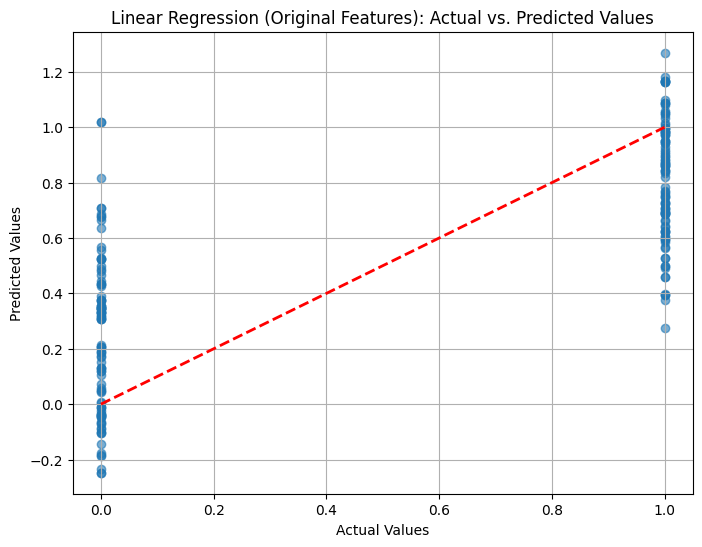

In [53]:
print("Visualizing actual vs. predicted values for Linear Regression on original features...")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_original, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (Original Features): Actual vs. Predicted Values')
plt.grid(True)
plt.show()


In [54]:
print("Performing statistical interpretation of coefficients using statsmodels OLS...")

# Add a constant (intercept) to X_train for statsmodels OLS
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
ols_model_original = sm.OLS(y_train, X_train_sm).fit()

# Print the summary of the OLS model
print(ols_model_original.summary())

print("OLS model summary generated successfully.")

Performing statistical interpretation of coefficients using statsmodels OLS...
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     50.43
Date:                Fri, 19 Dec 2025   Prob (F-statistic):          1.68e-134
Time:                        18:32:34   Log-Likelihood:                -237.29
No. Observations:                 820   AIC:                             520.6
Df Residuals:                     797   BIC:                             628.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [55]:
print("Training Linear Regression model on SVD-transformed features...")

# Instantiate Linear Regression model
linear_reg_svd = LinearRegression()

# Fit the model to the SVD-transformed training data
linear_reg_svd.fit(X_svd_train, y_svd_train)

# Make predictions on the SVD-transformed test data
y_pred_svd = linear_reg_svd.predict(X_svd_test)

print("Linear Regression model trained on SVD features and predictions made.")

Training Linear Regression model on SVD-transformed features...
Linear Regression model trained on SVD features and predictions made.


In [56]:
print("Evaluating Linear Regression model on SVD-transformed features...")

# Calculate Mean Squared Error (MSE)
mse_svd = mean_squared_error(y_svd_test, y_pred_svd)

# Calculate R-squared (R2) score
r2_svd = r2_score(y_svd_test, y_pred_svd)

print(f"Mean Squared Error (MSE) for SVD features: {mse_svd:.4f}")
print(f"R-squared (R2) Score for SVD features: {r2_svd:.4f}")

Evaluating Linear Regression model on SVD-transformed features...
Mean Squared Error (MSE) for SVD features: 0.1068
R-squared (R2) Score for SVD features: 0.5727


Visualizing actual vs. predicted values for Linear Regression on SVD features...


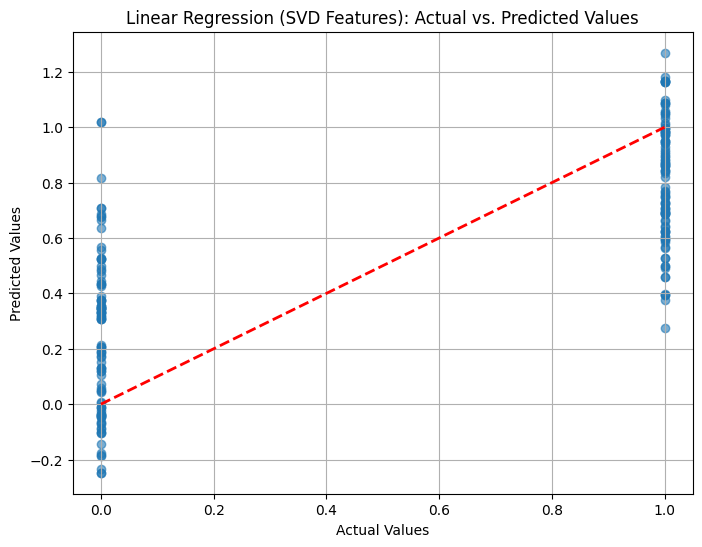

In [57]:
print("Visualizing actual vs. predicted values for Linear Regression on SVD features...")

plt.figure(figsize=(8, 6))
plt.scatter(y_svd_test, y_pred_svd, alpha=0.6)
plt.plot([y_svd_test.min(), y_svd_test.max()], [y_svd_test.min(), y_svd_test.max()], 'r--', lw=2) # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (SVD Features): Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [58]:
print("Performing statistical interpretation of coefficients for SVD features using statsmodels OLS...")

# Add a constant (intercept) to X_svd_train for statsmodels OLS
X_svd_train_sm = sm.add_constant(X_svd_train)

# Fit the OLS model
ols_model_svd = sm.OLS(y_svd_train, X_svd_train_sm).fit()

# Print the summary of the OLS model
print(ols_model_svd.summary())

print("OLS model summary for SVD features generated successfully.")

Performing statistical interpretation of coefficients for SVD features using statsmodels OLS...
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     50.43
Date:                Fri, 19 Dec 2025   Prob (F-statistic):          1.68e-134
Time:                        18:32:34   Log-Likelihood:                -237.29
No. Observations:                 820   AIC:                             520.6
Df Residuals:                     797   BIC:                             628.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [59]:
print("Re-applying SVD with 10 components...")

# Instantiate TruncatedSVD with 10 components based on explained variance analysis
svd_10_components = TruncatedSVD(n_components=10, random_state=42)
X_svd_10 = svd_10_components.fit_transform(X)

print(f"Shape of X_svd_10 (10 components): {X_svd_10.shape}")
print("First 5 rows of X_svd_10:")
print(X_svd_10[:5])

Re-applying SVD with 10 components...
Shape of X_svd_10 (10 components): (1025, 10)
First 5 rows of X_svd_10:
[[ 2.15234637  0.5862213  -0.5615645   0.44685908 -0.04457449 -0.28121068
   1.19356325 -0.75441076  0.46449594  0.08977655]
 [ 1.49118263 -1.26661447 -0.90198184  1.65506049 -0.86746646  0.00452582
   0.63913673  0.59694155  0.55217703 -0.28269515]
 [ 1.79958342 -2.3210192  -1.05196165  1.17791447  1.1091791   0.28177273
   0.44258619 -0.91163     0.68944643 -0.27864332]
 [ 2.14879399  0.09228628  0.34736402  0.82617498  1.30719796 -1.02310898
   0.92413645 -0.88430347  0.283254    0.18607731]
 [ 1.42185352 -2.06783013  0.49621053 -0.82639101  0.43784916  0.84602335
  -1.16481187 -0.62811927 -0.25260095 -0.29483199]]


In [60]:
print("Splitting SVD-transformed data (with 10 components) into training and testing sets...")
X_svd_train, X_svd_test, y_svd_train, y_svd_test = train_test_split(X_svd_10, y, test_size=0.2, stratify=y, random_state=42)

print(f"X_svd_train shape: {X_svd_train.shape}, y_svd_train shape: {y_svd_train.shape}")
print(f"X_svd_test shape: {X_svd_test.shape}, y_svd_test shape: {y_svd_test.shape}")

Splitting SVD-transformed data (with 10 components) into training and testing sets...
X_svd_train shape: (820, 10), y_svd_train shape: (820,)
X_svd_test shape: (205, 10), y_svd_test shape: (205,)


In [61]:
print("Training Linear Regression model on SVD-transformed features...")

# Instantiate Linear Regression model
linear_reg_svd = LinearRegression()

# Fit the model to the SVD-transformed training data
linear_reg_svd.fit(X_svd_train, y_svd_train)

# Make predictions on the SVD-transformed test data
y_pred_svd = linear_reg_svd.predict(X_svd_test)

print("Linear Regression model trained on SVD features and predictions made.")

Training Linear Regression model on SVD-transformed features...
Linear Regression model trained on SVD features and predictions made.


In [62]:
print("Evaluating Linear Regression model on SVD-transformed features (10 components)...")

# Calculate Mean Squared Error (MSE)
mse_svd_10 = mean_squared_error(y_svd_test, y_pred_svd)

# Calculate R-squared (R2) score
r2_svd_10 = r2_score(y_svd_test, y_pred_svd)

print(f"Mean Squared Error (MSE) for SVD features (10 components): {mse_svd_10:.4f}")
print(f"R-squared (R2) Score for SVD features (10 components): {r2_svd_10:.4f}")

Evaluating Linear Regression model on SVD-transformed features (10 components)...
Mean Squared Error (MSE) for SVD features (10 components): 0.1225
R-squared (R2) Score for SVD features (10 components): 0.5096


Visualizing actual vs. predicted values for Linear Regression on SVD features (10 components)...


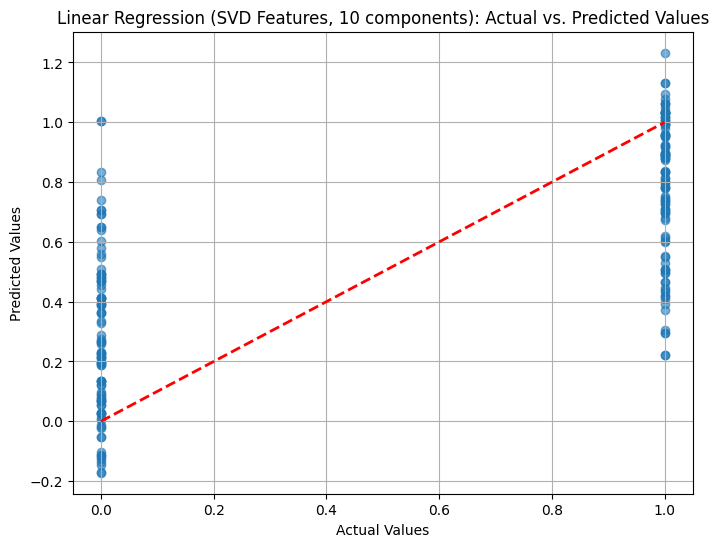

In [63]:
print("Visualizing actual vs. predicted values for Linear Regression on SVD features (10 components)...")

plt.figure(figsize=(8, 6))
plt.scatter(y_svd_test, y_pred_svd, alpha=0.6)
plt.plot([y_svd_test.min(), y_svd_test.max()], [y_svd_test.min(), y_svd_test.max()], 'r--', lw=2) # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (SVD Features, 10 components): Actual vs. Predicted Values')
plt.grid(True)
plt.show()

Visualizing actual vs. predicted values for Linear Regression on SVD features (10 components)...


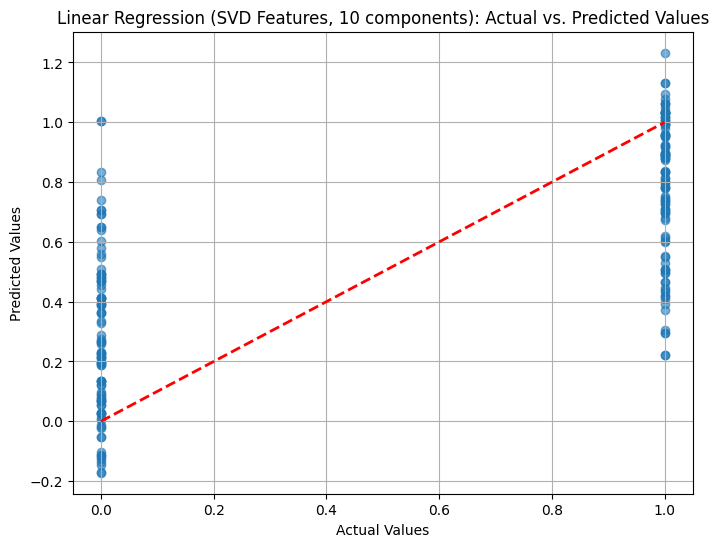

In [64]:
print("Visualizing actual vs. predicted values for Linear Regression on SVD features (10 components)...")

plt.figure(figsize=(8, 6))
plt.scatter(y_svd_test, y_pred_svd, alpha=0.6)
plt.plot([y_svd_test.min(), y_svd_test.max()], [y_svd_test.min(), y_svd_test.max()], 'r--', lw=2) # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression (SVD Features, 10 components): Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [65]:
print("Performing statistical interpretation of coefficients for SVD features (10 components) using statsmodels OLS...")

# Add a constant (intercept) to X_svd_train for statsmodels OLS
X_svd_train_sm = sm.add_constant(X_svd_train)

# Fit the OLS model
ols_model_svd_10 = sm.OLS(y_svd_train, X_svd_train_sm).fit()

# Print the summary of the OLS model
print(ols_model_svd_10.summary())

print("OLS model summary for SVD features (10 components) generated successfully.")

Performing statistical interpretation of coefficients for SVD features (10 components) using statsmodels OLS...
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     93.93
Date:                Fri, 19 Dec 2025   Prob (F-statistic):          4.06e-128
Time:                        18:32:35   Log-Likelihood:                -278.90
No. Observations:                 820   AIC:                             579.8
Df Residuals:                     809   BIC:                             631.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [67]:
print("Manually implementing K-fold Cross-Validation for TensorFlow Neural Network Models...")

cv_results_nn = []

nn_models_to_cv = [
    {'name': 'TensorFlow Neural Network (Original)', 'X': X, 'y': y},
    {'name': 'TensorFlow Neural Network (PCA)', 'X': X_pca, 'y': y},
    {'name': 'TensorFlow Neural Network (LDA)', 'X': X_lda, 'y': y}
]

for entry in nn_models_to_cv:
    model_name = entry['name']
    features_data = entry['X']
    target_data = entry['y']

    fold_accuracies = []
    print(f"\n--- Cross-validating {model_name} ---")

    for fold, (train_index, val_index) in enumerate(skf.split(features_data, target_data)):
        print(f"  Fold {fold + 1}/{skf.get_n_splits()}")
        X_train_fold, X_val_fold = features_data.iloc[train_index] if isinstance(features_data, pd.DataFrame) else features_data[train_index], features_data.iloc[val_index] if isinstance(features_data, pd.DataFrame) else features_data[val_index]
        y_train_fold, y_val_fold = target_data.iloc[train_index] if isinstance(target_data, pd.Series) else target_data[train_index], target_data.iloc[val_index] if isinstance(target_data, pd.Series) else target_data[val_index]

        # Define a new model for each fold to ensure fresh weights
        model_fold = Sequential([
            Dense(128, activation='relu', input_shape=(X_train_fold.shape[1],)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])

        # Compile the model
        model_fold.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        history_fold = model_fold.fit(
            X_train_fold, y_train_fold,
            epochs=50,
            batch_size=32,
            verbose=0 # Suppress output for each epoch
        )

        # Evaluate the model on the validation set
        _, accuracy_fold = model_fold.evaluate(X_val_fold, y_val_fold, verbose=0)
        fold_accuracies.append(accuracy_fold)

    mean_accuracy = np.mean(fold_accuracies)
    print(f"  Fold accuracies: {[f'{acc:.4f}' for acc in fold_accuracies]}")
    print(f"  Average accuracy for {model_name}: {mean_accuracy:.4f}")

    cv_results_nn.append({
        'Model': model_name,
        'Scores': fold_accuracies,
        'Mean Accuracy': mean_accuracy
    })

print("K-fold cross-validation complete for all TensorFlow Neural Network models.")

Manually implementing K-fold Cross-Validation for TensorFlow Neural Network Models...

--- Cross-validating TensorFlow Neural Network (Original) ---
  Fold 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 2/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 3/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 4/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 5/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold accuracies: ['0.9902', '1.0000', '1.0000', '1.0000', '0.9902']
  Average accuracy for TensorFlow Neural Network (Original): 0.9961

--- Cross-validating TensorFlow Neural Network (PCA) ---
  Fold 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
  Fold accuracies: ['1.0000', '1.0000', '0.9902', '0.9805', '1.0000']
  Average accuracy for TensorFlow Neural Network (PCA): 0.9941

--- Cross-validating TensorFlow Neural Network (LDA) ---
  Fold 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
  Fold accuracies: ['0.8780', '0.8878', '0.8634', '0.8585', '0.8634']
  Average accuracy for TensorFlow Neural Network (LDA): 0.8702
K-fold cross-validation complete for all TensorFlow Neural Network models.


In [77]:
cv_results_sklearn = []

# Define models and their corresponding feature sets
models_to_cv = [
    {'name': 'Gaussian Naive Bayes', 'model': GaussianNB(), 'features': X},
    {'name': 'Complement Naive Bayes', 'model': Pipeline([('scaler', MinMaxScaler()), ('cnb', ComplementNB())]), 'features': X},
    {'name': 'Decision Tree Classifier', 'model': DecisionTreeClassifier(random_state=42), 'features': X},
    {'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier(n_neighbors=5), 'features': X},
    {'name': 'PCA Classifier', 'model': LogisticRegression(solver='liblinear', random_state=42), 'features': X_pca},
    {'name': 'LDA Classifier', 'model': LogisticRegression(solver='liblinear', random_state=42), 'features': X_lda}
]

print("Performing Stratified K-Fold Cross-Validation for Scikit-learn Models...")

for entry in models_to_cv:
    model_name = entry['name']
    model_instance = entry['model']
    features_data = entry['features']

    print(f"\n--- Cross-validating {model_name} ---")
    scores = cross_val_score(model_instance, features_data, y, cv=skf, scoring='accuracy')
    mean_score = scores.mean()

    print(f"Scores for each fold: {scores}")
    print(f"Average accuracy: {mean_score:.4f}")

    cv_results_sklearn.append({
        'Model': model_name,
        'Scores': scores.tolist(),
        'Mean Accuracy': mean_score
    })

print("Cross-validation complete for all specified Scikit-learn models.")


# Original code from the failing cell (5657e901), now that cv_results_sklearn is ensured to be defined.
# cv_results_nn is assumed to be defined from a previously executed cell based on kernel state.
print("\nCombining cross-validation results and creating summary DataFrame...")

# Combine results from Scikit-learn models and Neural Networks
all_cv_results = cv_results_sklearn + cv_results_nn

# Create a pandas DataFrame for summary
summary_cv_df = pd.DataFrame(all_cv_results)

print("Summary of K-Fold Cross-Validation Results:")
display(summary_cv_df)

Performing Stratified K-Fold Cross-Validation for Scikit-learn Models...

--- Cross-validating Gaussian Naive Bayes ---
Scores for each fold: [0.84878049 0.86341463 0.84878049 0.80487805 0.83414634]
Average accuracy: 0.8400

--- Cross-validating Complement Naive Bayes ---
Scores for each fold: [0.83902439 0.83902439 0.85365854 0.83414634 0.85365854]
Average accuracy: 0.8439

--- Cross-validating Decision Tree Classifier ---
Scores for each fold: [1.        1.        1.        0.9804878 1.       ]
Average accuracy: 0.9961

--- Cross-validating K-Nearest Neighbors ---
Scores for each fold: [0.85853659 0.79512195 0.82926829 0.81463415 0.85853659]
Average accuracy: 0.8312

--- Cross-validating PCA Classifier ---
Scores for each fold: [0.88292683 0.86829268 0.86341463 0.85365854 0.86341463]
Average accuracy: 0.8663

--- Cross-validating LDA Classifier ---
Scores for each fold: [0.87804878 0.90243902 0.86341463 0.87317073 0.88780488]
Average accuracy: 0.8810
Cross-validation complete for all

,Model,Scores,Mean Accuracy
0,Gaussian Naive Bayes,"[0.848780487804878, 0.8634146341463415, 0.8487...",0.840000
1,Complement Naive Bayes,"[0.8390243902439024, 0.8390243902439024, 0.853...",0.843902
2,Decision Tree Classifier,"[1.0, 1.0, 1.0, 0.9804878048780488, 1.0]",0.996098
3,K-Nearest Neighbors,"[0.8585365853658536, 0.7951219512195122, 0.829...",0.831220
4,PCA Classifier,"[0.8829268292682927, 0.8682926829268293, 0.863...",0.866341
5,LDA Classifier,"[0.8780487804878049, 0.9024390243902439, 0.863...",0.880976
6,TensorFlow Neural Network (Original),"[0.9902439117431641, 1.0, 1.0, 1.0, 0.99024391...",0.996098
7,TensorFlow Neural Network (PCA),"[1.0, 1.0, 0.9902439117431641, 0.9804878234863...",0.994146
8,TensorFlow Neural Network (LDA),"[0.8780487775802612, 0.8878048658370972, 0.863...",0.870244


Generating Grouped Bar Chart for Average K-Fold Cross-Validation Accuracy...


/tmp/ipython-input-189024041.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Mean Accuracy', data=summary_cv_df, palette='viridis')


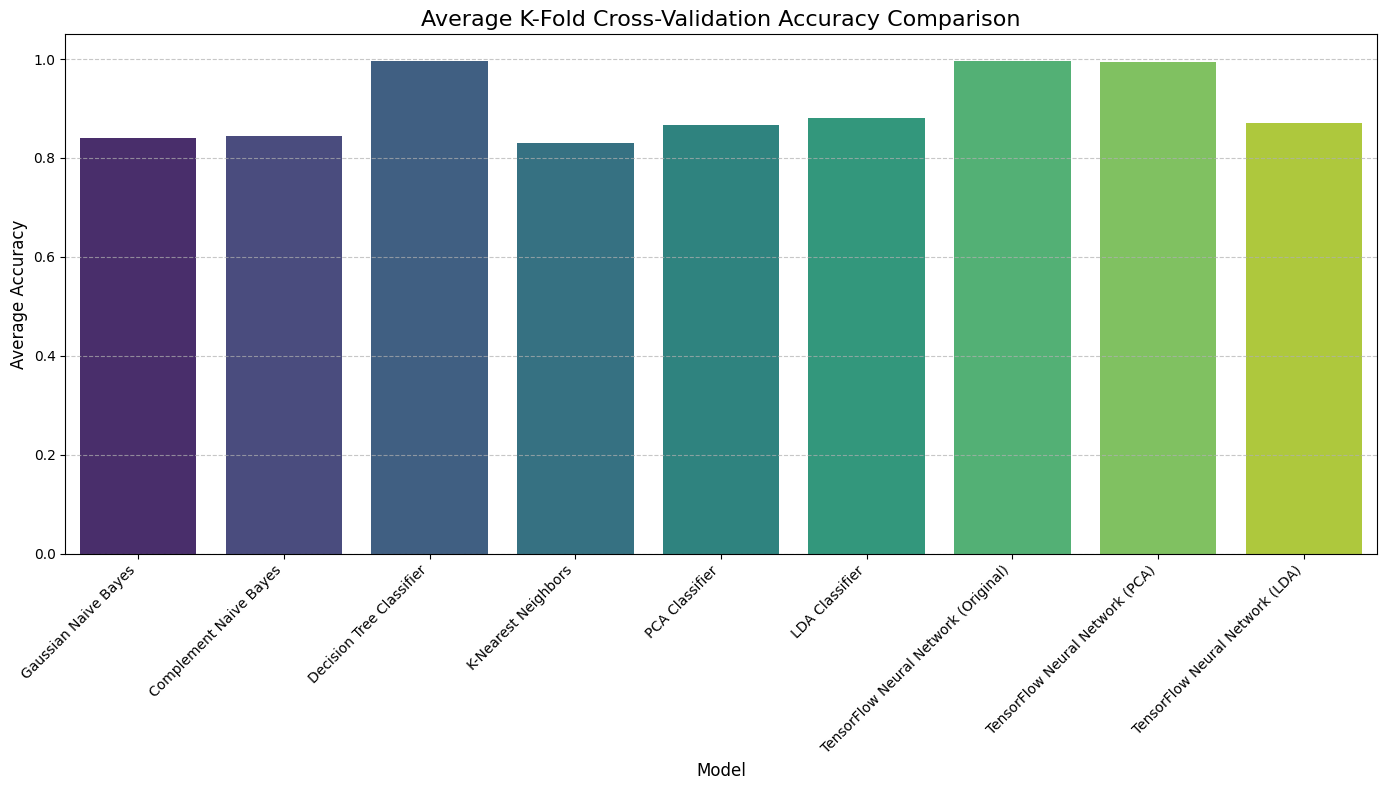

In [78]:
print("Generating Grouped Bar Chart for Average K-Fold Cross-Validation Accuracy...")

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Mean Accuracy', data=summary_cv_df, palette='viridis')

plt.title('Average K-Fold Cross-Validation Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.0, 1.05) # Ensure y-axis starts at 0 and goes slightly above 1 for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()